#                          **Projet ISSD 2024 - Houel Nathan**

Au cours de ces années le climat est une sujet qui est de plus en plus cité dans l’actualité dû au réchauffement climatique. Le climat est un phénomène très important pour l’Homme car il conditionne sa survie que ce soit au niveau de la température, des tempêtes ou encore d’autres phénomènes. C’est pour cela qu’il est donc très important de s’en intéresser et de l’étudier.

J’ai donc choisi de travailler sur la **base des données météorologiques** pour pouvoir étudier une partie du climat en France. En effet, je compte m'intéresser aux **tempêtes** car il s’agit d’un phénomène très important et qui crée souvent des désastres. Ma problématique est donc la suivante : 

###  **Problématique** : Quelles sont les régions en France métropolitaine qui sont le plus touchées par des tempêtes ?

Afin de répondre à cette problématique je vais chercher globalement à **filtrer** parmi toutes mes données, celles qui correspondent à des mesures liées à une tempête. Puis, je vais ensuite regarder quelles régions sont le plus touchées par des tempêtes pour pouvoir réaliser un **Top 5** des régions. Pour finir, je souhaite développer l’étude en réalisant une **prédiction** sur les 6 prochaines années du nombre de tempête qui peut potentiellement se réaliser pour chaque région.

# 1. Analyse et présentation des données

**Importation de l'ensemble des librairies nécessaires :**

In [1]:
import numpy as np 
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(color_codes = True)
sns.set(font_scale=1.5)
from scipy import stats
from IPython.display import Image
from sklearn.linear_model import LinearRegression

**Chargement du jeu de donnée original :**

In [2]:
DATA_original = pd.read_csv('data/data_meteo2.csv', delimiter = ';')
print('Nombre de mesure dans la base :' + str(len(DATA_original)))
DATA_original.head()

Nombre de mesure dans la base :976597


,Unnamed: 0,Date,Pression au niveau mer,Variation de pression en 3 heures,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,Visibilité horizontale,...,Température maximale sur 12 heures (°C),Température maximale sur 24 heures (°C),Température minimale du sol sur 12 heures (en °C),Latitude,Longitude,Altitude,department (name),department (code),region (name),mois_de_l_annee
0,2,2010-01-05T13:00:00+01:00,100720.0,-190.0,200.0,3.6,273.65,271.75,87.0,12000.0,...,NaN,NaN,NaN,49.180000,-0.456167,67,Calvados,14,Normandie,1
1,3,2010-01-05T13:00:00+01:00,100750.0,-230.0,210.0,4.1,276.95,272.55,73.0,25000.0,...,NaN,NaN,NaN,48.444167,-4.412000,94,Finistère,29,Bretagne,1
2,6,2010-01-05T13:00:00+01:00,101630.0,180.0,30.0,0.5,299.05,295.95,83.0,15000.0,...,NaN,30.4,NaN,14.595333,-60.995667,3,Martinique,972,Martinique,1
3,7,2010-01-05T16:00:00+01:00,100480.0,-150.0,190.0,1.5,274.85,271.45,78.0,12000.0,...,NaN,NaN,NaN,50.570000,3.097500,47,Nord,59,Hauts-de-France,1
4,8,2010-01-05T16:00:00+01:00,100530.0,-210.0,10.0,2.6,272.65,268.25,69.0,18000.0,...,NaN,NaN,NaN,48.716833,2.384333,89,Essonne,91,Île-de-France,1


**Affichage de l'en-tête :**

In [3]:
entete = list(DATA_original.columns)
print('Nombre de colonnes : ' + str(len(entete))) 
print(entete)

Nombre de colonnes : 53
['Unnamed: 0', 'Date', 'Pression au niveau mer', 'Variation de pression en 3 heures', 'Direction du vent moyen 10 mn', 'Vitesse du vent moyen 10 mn', 'Température', 'Point de rosée', 'Humidité', 'Visibilité horizontale', 'Temps présent', 'Temps passé 1', 'Temps passé 2', 'Nebulosité totale', "Nébulosité  des nuages de l' étage inférieur", "Hauteur de la base des nuages de l'étage inférieur", "Type des nuages de l'étage inférieur", "Type des nuages de l'étage moyen", "Type des nuages de l'étage supérieur", 'Pression station', 'Niveau barométrique', 'Variation de pression en 24 heures', 'Méthode de mesure Température du thermomètre mouillé', 'Température du thermomètre mouillé', 'Rafale sur les 10 dernières minutes', 'Rafales sur une période', 'Periode de mesure de la rafale', 'Etat du sol', 'Hauteur totale de la couche de neige, glace, autre au sol', 'Hauteur de la neige fraîche', 'Periode de mesure de la neige fraiche', 'Précipitations dans la dernière heure', '

**Copie de la base pour pouvoir la modifier et la remettre en forme :**

In [4]:
DATA = DATA_original.copy()

**Affichage des différentes valeurs pour chaque colonnes :**

In [5]:
mois = DATA.groupby(['mois_de_l_annee'])
mois.size()

mois_de_l_annee
1     88384
2     78170
3     81751
4     79074
5     81454
6     79185
7     81907
8     82497
9     80236
10    82087
11    79674
12    82178
dtype: int64

In [6]:
DATA["Température (°C)"].describe()

count    975597.000000
mean         15.618396
std           8.453559
min         -19.700000
25%           9.200000
50%          14.900000
75%          22.900000
max          67.700000
Name: Température (°C), dtype: float64

En réalisant cette manipulation un bon nombre de fois sur à peu près toutes les colonnes, j'ai pu **analyser et visualiser** les différentes types d’informations que j’avais dans ce jeu de données. 

Ainsi, ce jeu de données représente des données météorologiques en **France métropolitaine** mais aussi celles de ses **DROM-COM**. Nous avons au total **976 597 mesures** et **53 données par mesure**. Nous retrouvons parmi ces données de nombreuses informations précieuses telles que la **date, la température, la pression, les précipitations** dans un certain intervalles de temps,etc..


En ce qui concerne la date, les données de ce jeu vont du **1er Janvier 2010** à 1h jusqu’au **19 Février 2024** à 19h. Entre chaque mesure nous avons un intervalle de temps de **3 heures**.

Pour la localisation, nous avons au total **14 régions** mélangeant des régions DROM-COM et des régions métropolitaines. Et parmi ces 14 régions, nous avons au total **25 stations**.

Cependant, on remarque que l’ordre des mesures n’est pas **chronologique**, il est donc compliqué de pouvoir mieux analyser les données dans ce cas-là. Je vais donc passer au pré-traitement des données pour pouvoir mieux les analyser.

# 2. Pré-traitement et nettoyage du jeu de données

L’objectif ici va être de **remettre en forme** l’ensemble du jeu de données, en remettant dans l’ordre chronologique les mesures, en **supprimant les doublons** mais aussi les colonnes qui ne nous intéressent pas pour répondre à la problématique. Une fois que toutes les données inutiles seront supprimées, je vais mettre en index du jeu de données la date pour que l’étude soit plus facile.

**Modification afin d'afficher les mesures dans l'ordre chronologique** :

In [7]:
df = pd.DataFrame(DATA)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df.head(n=1000000)[["Date", "mois_de_l_annee"]]

,Date,mois_de_l_annee
358652,2010-01-01 01:00:00+01:00,1
544620,2010-01-01 01:00:00+01:00,1
544619,2010-01-01 01:00:00+01:00,1
310595,2010-01-01 01:00:00+01:00,1
61487,2010-01-01 01:00:00+01:00,1
...,...,...
917658,2024-02-19 19:00:00+01:00,2
843837,2024-02-19 19:00:00+01:00,2
917657,2024-02-19 19:00:00+01:00,2
891851,2024-02-19 19:00:00+01:00,2


On remarque maintenant que les mesures sont affichées dans l'ordre chronologique.

**Suppression des doublons** :

In [8]:
df_clean = df.head(n=10000000).drop_duplicates()
print(df.head(n=10000000).Température.mean())
print(df_clean.Température.mean())
print(len(df))
print(len(df_clean))
df_clean.head()

288.7683957105239
288.7683957105239
976597
976597


,Unnamed: 0,Date,Pression au niveau mer,Variation de pression en 3 heures,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,Visibilité horizontale,...,Température maximale sur 12 heures (°C),Température maximale sur 24 heures (°C),Température minimale du sol sur 12 heures (en °C),Latitude,Longitude,Altitude,department (name),department (code),region (name),mois_de_l_annee
358652,877895,2010-01-01 01:00:00+01:00,99080.0,-120.0,0.0,0.0,280.65,278.75,88.0,12000.0,...,NaN,NaN,NaN,45.726500,5.077833,235,Rhône,69,Auvergne-Rhône-Alpes,1
544620,1335100,2010-01-01 01:00:00+01:00,99210.0,20.0,240.0,2.6,280.85,280.45,97.0,NaN,...,NaN,NaN,NaN,44.745000,1.396667,260,Lot,46,Occitanie,1
544619,1335099,2010-01-01 01:00:00+01:00,99530.0,10.0,30.0,5.7,273.95,273.05,94.0,4500.0,...,NaN,NaN,NaN,48.716833,2.384333,89,Essonne,91,Île-de-France,1
310595,759786,2010-01-01 01:00:00+01:00,99250.0,-100.0,310.0,3.6,283.65,280.85,83.0,40000.0,...,NaN,NaN,NaN,43.648833,7.209000,2,Alpes-Maritimes,06,Provence-Alpes-Côte d'Azur,1
61487,150878,2010-01-01 01:00:00+01:00,99360.0,90.0,30.0,5.1,278.05,276.35,89.0,9000.0,...,NaN,NaN,NaN,47.150000,-1.608833,26,Loire-Atlantique,44,Pays de la Loire,1


En réalisant cette manipulation nous pouvons remarquer que l'après cette manipulation n'a pas changé le nombre de mesure présentes dans notre jeu de données. On en conclut donc qu'il n'y avait pas de doublon.

**Suppression de colonne** :

Pour mon étude, les données qui vont être les plus intéressantes vont être celles liées à la **localisation, au vent, aux rafales, à la température, aux précipitations** et évidemment la **date**.
Je décide donc de supprimer toutes les autres colonnes qui ne sont pas liées à ces paramètres pour pouvoir alléger mon jeu de données.

In [9]:
colonnes_supprimes = ["Point de rosée","Humidité","Visibilité horizontale", "Etat du sol",'Niveau barométrique', 'Méthode de mesure Température du thermomètre mouillé', 'Température du thermomètre mouillé', "Hauteur de la base des nuages de l'étage inférieur", "Type des nuages de l'étage inférieur", "Type des nuages de l'étage moyen", "Type des nuages de l'étage supérieur", "Nébulosité  des nuages de l' étage inférieur", 'Phénomène spécial 1', 'Phénomène spécial 2', 'Phénomène spécial 3', 'Phénomène spécial 4', 'Unnamed: 0', 'Hauteur totale de la couche de neige, glace, autre au sol', 'Hauteur de la neige fraîche', 'Periode de mesure de la neige fraiche', 'Temps présent', 'Temps passé 1', 'Temps passé 2', 'Nebulosité totale' ]
df = df_clean.drop(columns=colonnes_supprimes)
df.head()

,Date,Pression au niveau mer,Variation de pression en 3 heures,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Pression station,Variation de pression en 24 heures,Rafale sur les 10 dernières minutes,Rafales sur une période,...,Température maximale sur 12 heures (°C),Température maximale sur 24 heures (°C),Température minimale du sol sur 12 heures (en °C),Latitude,Longitude,Altitude,department (name),department (code),region (name),mois_de_l_annee
358652,2010-01-01 01:00:00+01:00,99080.0,-120.0,0.0,0.0,280.65,96250.0,NaN,NaN,4.1,...,NaN,NaN,NaN,45.726500,5.077833,235,Rhône,69,Auvergne-Rhône-Alpes,1
544620,2010-01-01 01:00:00+01:00,99210.0,20.0,240.0,2.6,280.85,96130.0,NaN,NaN,7.2,...,NaN,NaN,NaN,44.745000,1.396667,260,Lot,46,Occitanie,1
544619,2010-01-01 01:00:00+01:00,99530.0,10.0,30.0,5.7,273.95,98420.0,NaN,NaN,8.7,...,NaN,NaN,NaN,48.716833,2.384333,89,Essonne,91,Île-de-France,1
310595,2010-01-01 01:00:00+01:00,99250.0,-100.0,310.0,3.6,283.65,98920.0,NaN,NaN,6.7,...,NaN,NaN,NaN,43.648833,7.209000,2,Alpes-Maritimes,06,Provence-Alpes-Côte d'Azur,1
61487,2010-01-01 01:00:00+01:00,99360.0,90.0,30.0,5.1,278.05,99040.0,NaN,NaN,9.8,...,NaN,NaN,NaN,47.150000,-1.608833,26,Loire-Atlantique,44,Pays de la Loire,1


**Affichage de l'en-tête** :

In [10]:
entete = list(df.columns)
print('Nombre de colonnes : ' + str(len(entete))) 
df.isnull().sum()

Nombre de colonnes : 29


Date                                                      0
Pression au niveau mer                                 1293
Variation de pression en 3 heures                     14559
Direction du vent moyen 10 mn                          2261
Vitesse du vent moyen 10 mn                            2124
Température                                            1000
Pression station                                      48981
Variation de pression en 24 heures                   333346
Rafale sur les 10 dernières minutes                  423701
Rafales sur une période                              126228
Periode de mesure de la rafale                       125496
Précipitations dans la dernière heure                 60339
Précipitations dans les 3 dernières heures            62105
Précipitations dans les 12 dernières heures          293268
Précipitations dans les 24 dernières heures          322997
Nom                                                       0
Température (°C)                        

Nous sommes donc passés de **53 données** par mesure à **29 données** par mesure.

**Mise en place de la colonne 'date' en index du jeu de données** :

In [11]:
df.set_index(df.columns[0], inplace=True)
df.head()

,Pression au niveau mer,Variation de pression en 3 heures,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Pression station,Variation de pression en 24 heures,Rafale sur les 10 dernières minutes,Rafales sur une période,Periode de mesure de la rafale,...,Température maximale sur 12 heures (°C),Température maximale sur 24 heures (°C),Température minimale du sol sur 12 heures (en °C),Latitude,Longitude,Altitude,department (name),department (code),region (name),mois_de_l_annee
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01 01:00:00+01:00,99080.0,-120.0,0.0,0.0,280.65,96250.0,NaN,NaN,4.1,-10.0,...,NaN,NaN,NaN,45.726500,5.077833,235,Rhône,69,Auvergne-Rhône-Alpes,1
2010-01-01 01:00:00+01:00,99210.0,20.0,240.0,2.6,280.85,96130.0,NaN,NaN,7.2,-10.0,...,NaN,NaN,NaN,44.745000,1.396667,260,Lot,46,Occitanie,1
2010-01-01 01:00:00+01:00,99530.0,10.0,30.0,5.7,273.95,98420.0,NaN,NaN,8.7,-10.0,...,NaN,NaN,NaN,48.716833,2.384333,89,Essonne,91,Île-de-France,1
2010-01-01 01:00:00+01:00,99250.0,-100.0,310.0,3.6,283.65,98920.0,NaN,NaN,6.7,-10.0,...,NaN,NaN,NaN,43.648833,7.209000,2,Alpes-Maritimes,06,Provence-Alpes-Côte d'Azur,1
2010-01-01 01:00:00+01:00,99360.0,90.0,30.0,5.1,278.05,99040.0,NaN,NaN,9.8,-10.0,...,NaN,NaN,NaN,47.150000,-1.608833,26,Loire-Atlantique,44,Pays de la Loire,1


**Réarrangement de l'ordre des colonnes**:

In [12]:
nouvel_ordre_colonne = ['mois_de_l_annee', 'Nom', 'region (name)', 'department (name)', 'department (code)', 'Latitude', 'Longitude', 'Altitude', 'Température', 'Température (°C)', 'Température minimale sur 12 heures (°C)', 'Température minimale sur 24 heures (°C)', 'Température maximale sur 12 heures (°C)', 'Température maximale sur 24 heures (°C)', 'Température minimale du sol sur 12 heures (en °C)', 'Pression au niveau mer', 'Variation de pression en 3 heures', 'Pression station', 'Variation de pression en 24 heures', 'Direction du vent moyen 10 mn', 'Vitesse du vent moyen 10 mn', 'Rafale sur les 10 dernières minutes', 'Rafales sur une période', 'Periode de mesure de la rafale', 'Précipitations dans la dernière heure', 'Précipitations dans les 3 dernières heures', 'Précipitations dans les 12 dernières heures', 'Précipitations dans les 24 dernières heures']
df = df.reindex(columns=nouvel_ordre_colonne)
df.head()

,mois_de_l_annee,Nom,region (name),department (name),department (code),Latitude,Longitude,Altitude,Température,Température (°C),...,Variation de pression en 24 heures,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Rafale sur les 10 dernières minutes,Rafales sur une période,Periode de mesure de la rafale,Précipitations dans la dernière heure,Précipitations dans les 3 dernières heures,Précipitations dans les 12 dernières heures,Précipitations dans les 24 dernières heures
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01 01:00:00+01:00,1,LYON-ST EXUPERY,Auvergne-Rhône-Alpes,Rhône,69,45.726500,5.077833,235,280.65,7.5,...,NaN,0.0,0.0,NaN,4.1,-10.0,0.0,0.0,NaN,NaN
2010-01-01 01:00:00+01:00,1,GOURDON,Occitanie,Lot,46,44.745000,1.396667,260,280.85,7.7,...,NaN,240.0,2.6,NaN,7.2,-10.0,0.0,3.0,NaN,NaN
2010-01-01 01:00:00+01:00,1,ORLY,Île-de-France,Essonne,91,48.716833,2.384333,89,273.95,0.8,...,NaN,30.0,5.7,NaN,8.7,-10.0,0.0,0.0,NaN,NaN
2010-01-01 01:00:00+01:00,1,NICE,Provence-Alpes-Côte d'Azur,Alpes-Maritimes,06,43.648833,7.209000,2,283.65,10.5,...,NaN,310.0,3.6,NaN,6.7,-10.0,0.0,0.0,NaN,NaN
2010-01-01 01:00:00+01:00,1,NANTES-BOUGUENAIS,Pays de la Loire,Loire-Atlantique,44,47.150000,-1.608833,26,278.05,4.9,...,NaN,30.0,5.1,NaN,9.8,-10.0,0.0,0.0,NaN,NaN


**Modification des valeurs de la colonne 'mois_de_l_annee'** :

In [13]:
dico = {1: 'Janvier', 2: 'Février', 3: 'Mars', 4: 'Avril', 5: 'Mai', 6: 'Juin', 7: 'Juillet', 8: 'Août', 9: 'Septembre', 10: 'Octobre', 11: 'Novembre', 12: 'Décembre'}

df_perfect = df.copy()
df_perfect["mois_de_l_annee"] = df["mois_de_l_annee"].map(dico)
df_perfect.head()

,mois_de_l_annee,Nom,region (name),department (name),department (code),Latitude,Longitude,Altitude,Température,Température (°C),...,Variation de pression en 24 heures,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Rafale sur les 10 dernières minutes,Rafales sur une période,Periode de mesure de la rafale,Précipitations dans la dernière heure,Précipitations dans les 3 dernières heures,Précipitations dans les 12 dernières heures,Précipitations dans les 24 dernières heures
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01 01:00:00+01:00,Janvier,LYON-ST EXUPERY,Auvergne-Rhône-Alpes,Rhône,69,45.726500,5.077833,235,280.65,7.5,...,NaN,0.0,0.0,NaN,4.1,-10.0,0.0,0.0,NaN,NaN
2010-01-01 01:00:00+01:00,Janvier,GOURDON,Occitanie,Lot,46,44.745000,1.396667,260,280.85,7.7,...,NaN,240.0,2.6,NaN,7.2,-10.0,0.0,3.0,NaN,NaN
2010-01-01 01:00:00+01:00,Janvier,ORLY,Île-de-France,Essonne,91,48.716833,2.384333,89,273.95,0.8,...,NaN,30.0,5.7,NaN,8.7,-10.0,0.0,0.0,NaN,NaN
2010-01-01 01:00:00+01:00,Janvier,NICE,Provence-Alpes-Côte d'Azur,Alpes-Maritimes,06,43.648833,7.209000,2,283.65,10.5,...,NaN,310.0,3.6,NaN,6.7,-10.0,0.0,0.0,NaN,NaN
2010-01-01 01:00:00+01:00,Janvier,NANTES-BOUGUENAIS,Pays de la Loire,Loire-Atlantique,44,47.150000,-1.608833,26,278.05,4.9,...,NaN,30.0,5.1,NaN,9.8,-10.0,0.0,0.0,NaN,NaN


Grâce à cette manipulation les valeurs numérique de la colonne ‘mois_de_l_annee’ sont devenues le vrai nom du mois, ce qui facilite l’étude pour la suite.

**Modification des valeurs NaN par des 0** :

Maintenant je souhaite remplacer les NaN par des 0. Cependant, il faut faire très **attention** car il n’est pas possible de modifier les NaN pour toutes les colonnes. En effet, remplacer une température en Kelvin par 0 n’a pas de sens. Alors que pour le cas de des précipitations par exemple, le remplacement par 0 reste correct, il est possible qu’il y ait eu 0 mm de précipitation. Je décide donc de faire le remplacement sur des **colonnes bien choisies**. 

In [14]:
df_perfect.head()[["Rafale sur les 10 dernières minutes", "Rafales sur une période", "Periode de mesure de la rafale","Précipitations dans la dernière heure", "Précipitations dans les 3 dernières heures", "Précipitations dans les 12 dernières heures", "Précipitations dans les 24 dernières heures"]]

,Rafale sur les 10 dernières minutes,Rafales sur une période,Periode de mesure de la rafale,Précipitations dans la dernière heure,Précipitations dans les 3 dernières heures,Précipitations dans les 12 dernières heures,Précipitations dans les 24 dernières heures
Date,,,,,,,
2010-01-01 01:00:00+01:00,NaN,4.1,-10.0,0.0,0.0,NaN,NaN
2010-01-01 01:00:00+01:00,NaN,7.2,-10.0,0.0,3.0,NaN,NaN
2010-01-01 01:00:00+01:00,NaN,8.7,-10.0,0.0,0.0,NaN,NaN
2010-01-01 01:00:00+01:00,NaN,6.7,-10.0,0.0,0.0,NaN,NaN
2010-01-01 01:00:00+01:00,NaN,9.8,-10.0,0.0,0.0,NaN,NaN


In [15]:
df_perfect["Rafale sur les 10 dernières minutes"].fillna(0, inplace = True)
df_perfect["Rafales sur une période"].fillna(0, inplace = True)
df_perfect["Periode de mesure de la rafale"].fillna(0, inplace = True)
df_perfect["Précipitations dans la dernière heure"].fillna(0, inplace=True)
df_perfect["Précipitations dans les 3 dernières heures"].fillna(0, inplace=True)
df_perfect["Précipitations dans les 12 dernières heures"].fillna(0, inplace=True)
df_perfect["Précipitations dans les 24 dernières heures"].fillna(0, inplace=True)
df_perfect.head()[["Rafale sur les 10 dernières minutes", "Rafales sur une période", "Periode de mesure de la rafale","Précipitations dans la dernière heure", "Précipitations dans les 3 dernières heures", "Précipitations dans les 12 dernières heures", "Précipitations dans les 24 dernières heures"]]

,Rafale sur les 10 dernières minutes,Rafales sur une période,Periode de mesure de la rafale,Précipitations dans la dernière heure,Précipitations dans les 3 dernières heures,Précipitations dans les 12 dernières heures,Précipitations dans les 24 dernières heures
Date,,,,,,,
2010-01-01 01:00:00+01:00,0.0,4.1,-10.0,0.0,0.0,0.0,0.0
2010-01-01 01:00:00+01:00,0.0,7.2,-10.0,0.0,3.0,0.0,0.0
2010-01-01 01:00:00+01:00,0.0,8.7,-10.0,0.0,0.0,0.0,0.0
2010-01-01 01:00:00+01:00,0.0,6.7,-10.0,0.0,0.0,0.0,0.0
2010-01-01 01:00:00+01:00,0.0,9.8,-10.0,0.0,0.0,0.0,0.0


On remarque bien ici que nous n'avons plus de valeurs NaN mais des 0 à la place.

**Recherche et suppression de valeurs aberrantes** :

Nous allons maintenant vérifier que nous n’avons pas de valeurs **aberrantes** dans notre jeu de données. Dans le cas qui suit, je réalise la manipulation avec seulement la **température** et les **précipitations** pour montrer comme exemple, mais il est important de noter que l’analyse de données aberrantes a été réalisée sur l’ensemble de données.

**Affichage des températures** :

In [16]:
df_perfect["Température (°C)"].describe()

count    975597.000000
mean         15.618396
std           8.453559
min         -19.700000
25%           9.200000
50%          14.900000
75%          22.900000
max          67.700000
Name: Température (°C), dtype: float64

On retrouve une valeur max de **67,7 °C** ce qui semble aberrant.

On va donc chercher à vérifier cette valeur pour savoir si elle est cohérente ou pas. Pour cela, j'ai cherché sur internet la valeur maximale relevée en France. Source : https://meteofrance.com/magazine/meteo-questions/quelle-est-la-temperature-la-plus-elevee-enregistree-en-france

In [17]:
max_temp = df_perfect[df_perfect["Température (°C)"] > 46.0] #46 est la température max relevée en France
max_temp.head()[["Température (°C)", "region (name)"]]

,Température (°C),region (name)
Date,,
2010-10-24 08:00:00+02:00,67.7,Martinique
2012-12-16 04:00:00+01:00,66.2,Martinique


On remarque ici la présence de **2 valeurs** de températures un trop élevées.
D'après Météo France, la température maximale en Martinique est de **34.6°C**.
On en déduit donc que ces 2 températures sont incohérentes et qu'il s'agit d'erreurs des capteurs.
On va donc supprimer ces 2 valeurs : 

In [18]:
df = df_perfect.copy()
indexNames = df[df["Température (°C)"] > 46].index
df.drop(indexNames, inplace = True)
df["Température (°C)"].describe()

count    975550.000000
mean         15.618520
std           8.453268
min         -19.700000
25%           9.200000
50%          14.900000
75%          22.900000
max          42.000000
Name: Température (°C), dtype: float64

Nous avons maintenant une valeur maximale qui est **42°C** ce qui est plus cohérent.

**Affichage des précipitations dans l'heure** :

In [19]:
df["Précipitations dans la dernière heure"].describe()

count    976550.000000
mean          0.083197
std           0.665146
min          -0.100000
25%           0.000000
50%           0.000000
75%           0.000000
max          93.000000
Name: Précipitations dans la dernière heure, dtype: float64

On remarque que le maximum est à **93 mm**, ce qui paraît aberrant. 
Regardons combien de fois apparaît cette valeur :

In [20]:
preci = df.groupby("Précipitations dans la dernière heure")
preci.size()

Précipitations dans la dernière heure
-0.1      36284
 0.0     863278
 0.2      27889
 0.3         44
 0.4      11673
          ...  
 59.5         1
 60.0         1
 61.5         1
 64.9         1
 93.0         1
Length: 285, dtype: int64

On remarque qu'il y a un grand saut pour la valeur 93. Je vais donc regarder à quelle date elle correspond :

In [21]:
max_preci = df_perfect[df_perfect["Précipitations dans la dernière heure"] > 90 ]
max_preci.head()[["mois_de_l_annee", "Nom","region (name)", "Précipitations dans la dernière heure"]]

,mois_de_l_annee,Nom,region (name),Précipitations dans la dernière heure
Date,,,,
2014-09-29 17:00:00+02:00,Septembre,MONTPELLIER,Occitanie,93.0


On voit donc ici que la valeur de 93 mm a été mesurée le 29 septembre 2014 à la station de Montpellier.
En vérifiant sur internet, d'après un reportage de franceinfo (https://france3-regions.francetvinfo.fr/occitanie/2014/09/30/un-record-historique-de-pluie-montpellier-et-des-millions-de-degats-dans-l-herault-561820.html), cette valeur paraît **cohérente** ! Il n'y a donc aucune raison de supprimer cette valeur.

Une fois que tout le jeu de données a été traité et nettoyé il va donc être possible d’afficher les différentes données et de les interpréter.

# 3. Représentation des données

In [22]:
Data = df.copy()

L’objectif ici est d’afficher les données les plus intéressantes pour pouvoir les interpréter et en tirer des conclusions qui peuvent refléter ce que l’on sait déjà et ainsi valider la cohérence de nos données.

**Température** :

<Figure size 2000x2000 with 0 Axes>

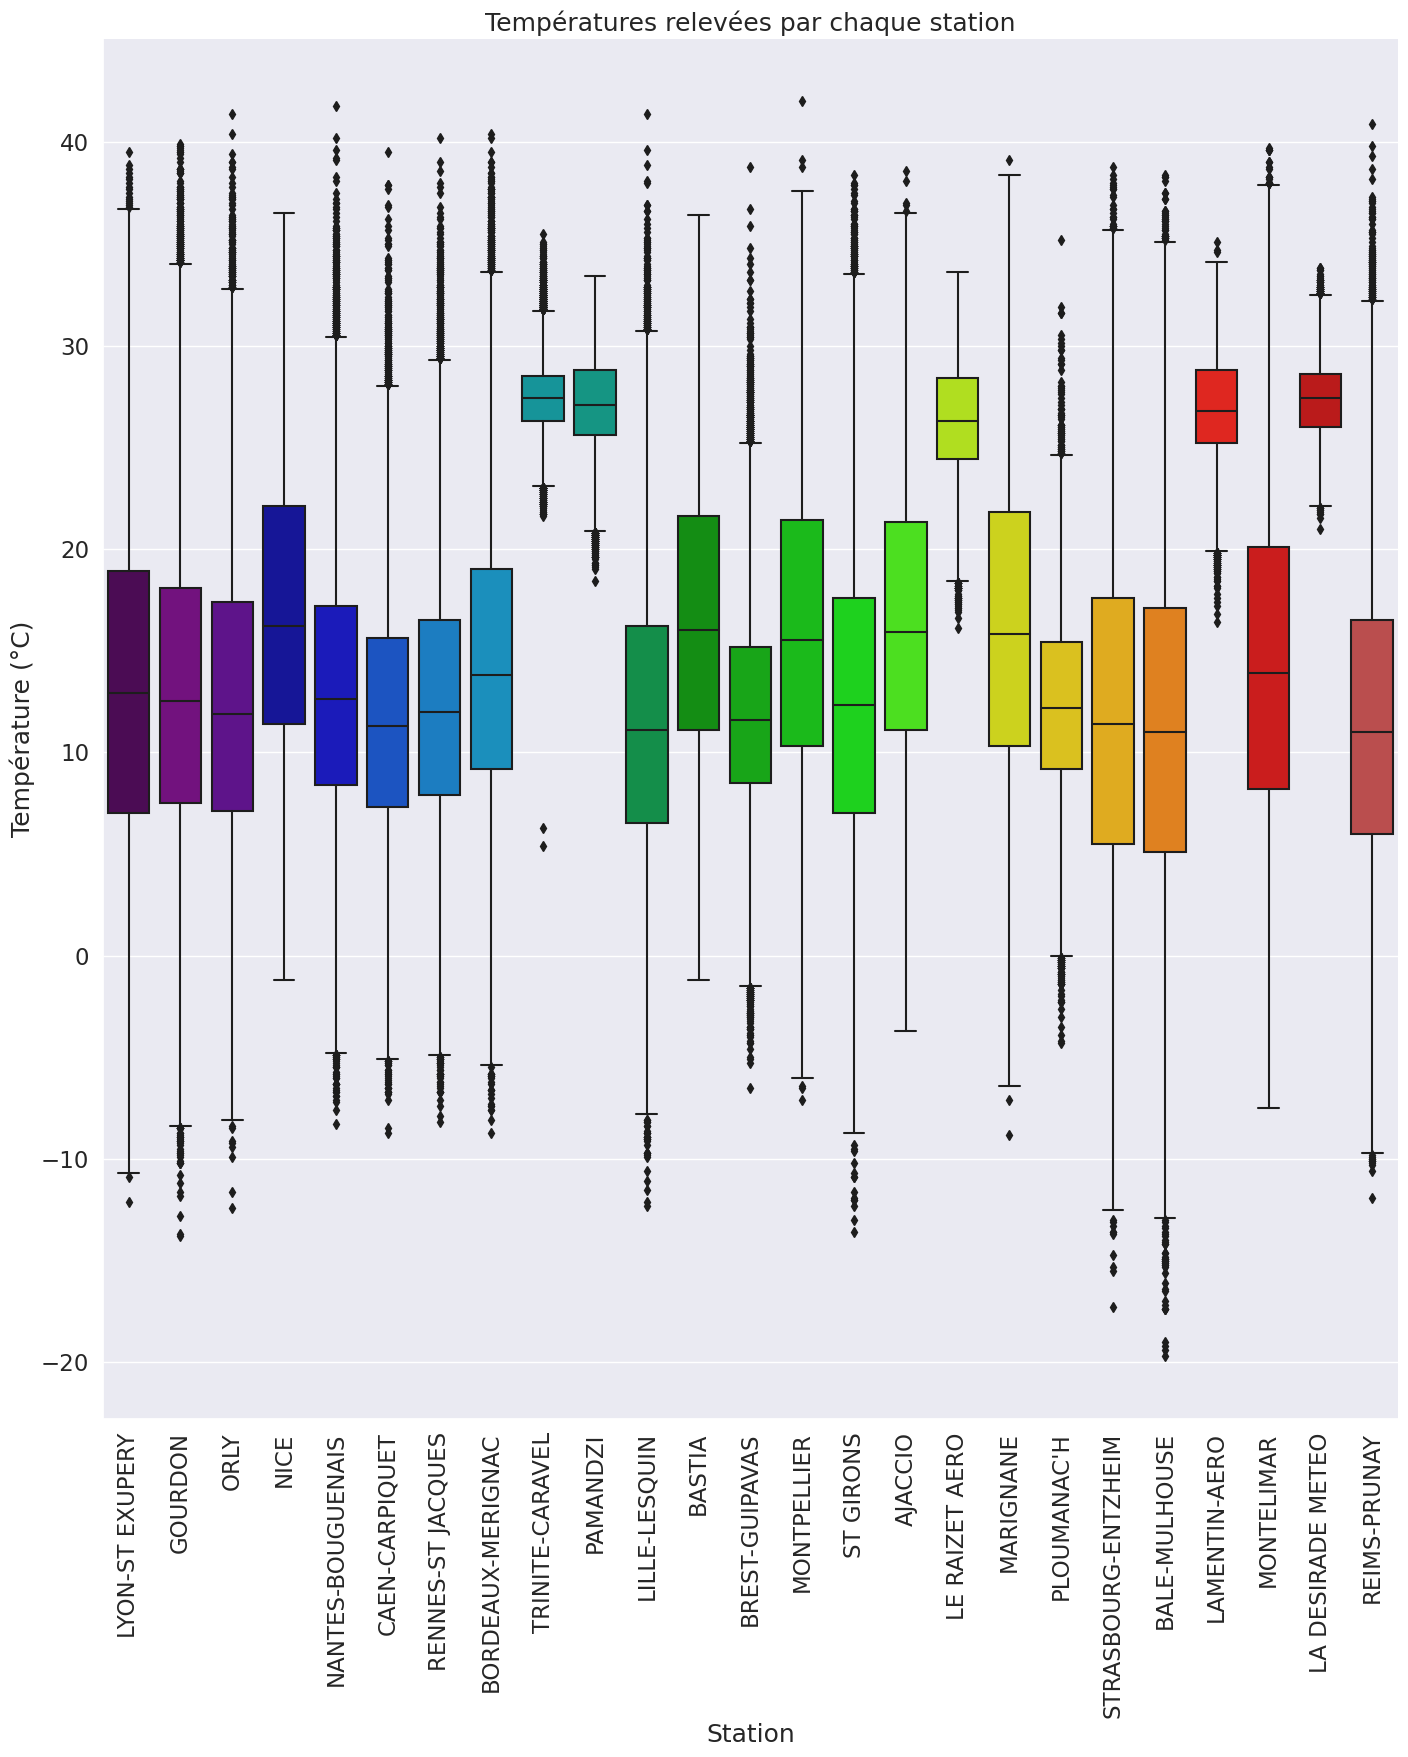

In [23]:
plt.figure(figsize = (20,20))
sns.catplot(x="Nom", y="Température (°C)",kind = "box",height = 15, data = Data, palette="nipy_spectral")
plt.title("Températures relevées par chaque station")
plt.xlabel("Station")
plt.ylabel("Température (°C)")
plt.xticks(rotation=90)
plt.show()

In [24]:
print("Moyenne de la température à partir de chaque station :" + str(Data["Température (°C)"].mean()) + "°C") 

Moyenne de la température à partir de chaque station :15.618520424376014°C


On remarque que pour chaque station nous avons des valeurs cohérentes selon leur localisation. De plus leurs extremums sont de plus cohérents. La moyenne de température obtenue est elle aussi correcte car elle est de **15.6°C**, or la température moyenne en France métropolitaine est de **14.6°C**. Cette différence de 1°C peut être expliquée par la présence des DROM-COM qui vont avoir tendance à remonter cette moyenne.
Source : https://www.ecologie.gouv.fr/impacts-du-changement-climatique-atmosphere-temperatures-et-precipitations

**Précipitations** :

<Figure size 2000x2000 with 0 Axes>

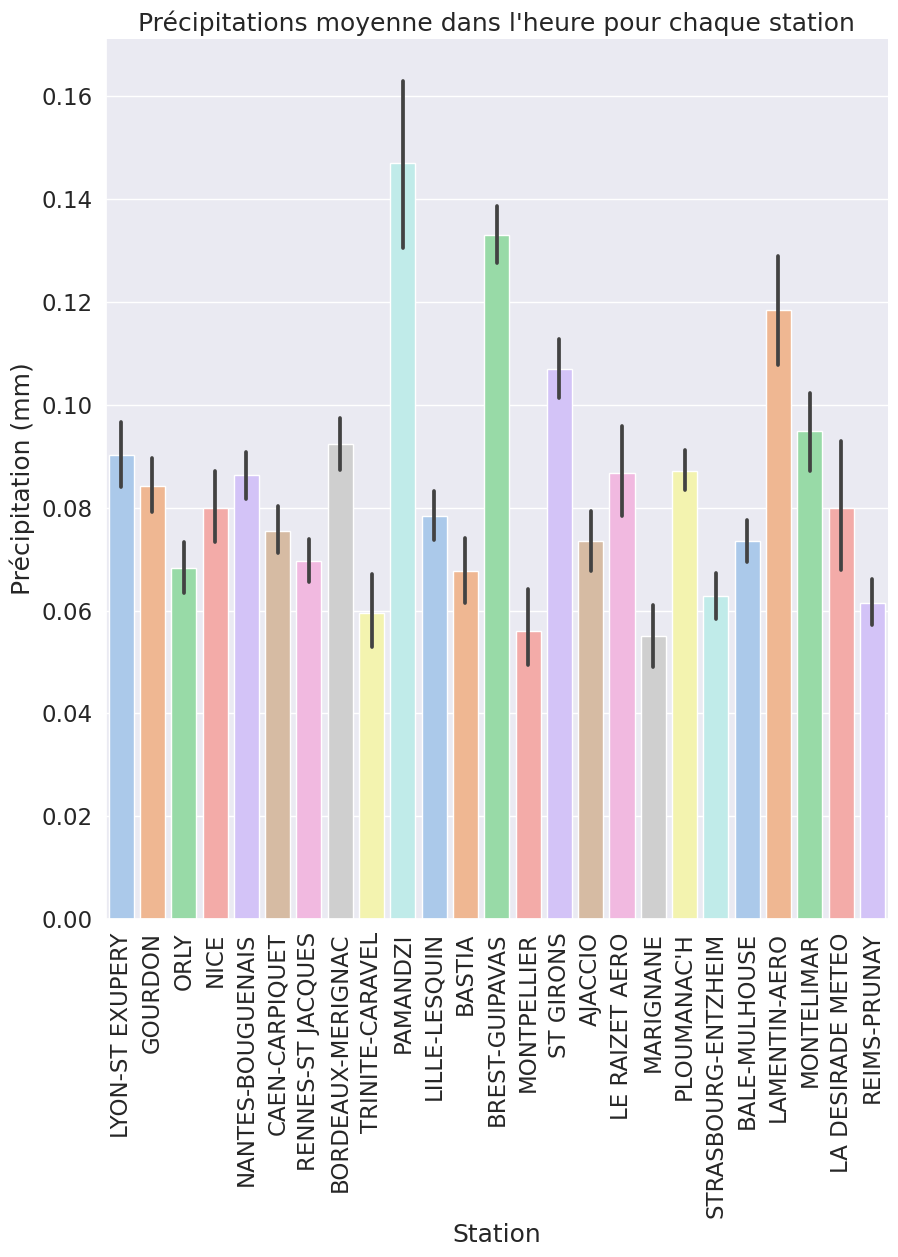

In [25]:
plt.figure(figsize = (20,20))
sns.catplot(x="Nom", y="Précipitations dans la dernière heure",kind = "bar",height = 10, data = Data, palette="pastel")
plt.title("Précipitations moyenne dans l'heure pour chaque station")
plt.xlabel("Station")
plt.ylabel("Précipitation (mm)")
plt.xticks(rotation=90)
plt.show()

In [26]:
print("Moyenne des précipitaions dans l'heure :" + str(Data["Précipitations dans la dernière heure"].mean())+" mm") 

Moyenne des précipitaions dans l'heure :0.08319737852644513 mm


On remarque ici que en moyenne les précipitations sont de à peu près 0.1 mm. On remarque tout de même 4 stations pour lesquelles leur moyenne est au-dessus de la normale.

**Rafales**:

<Figure size 2000x2000 with 0 Axes>

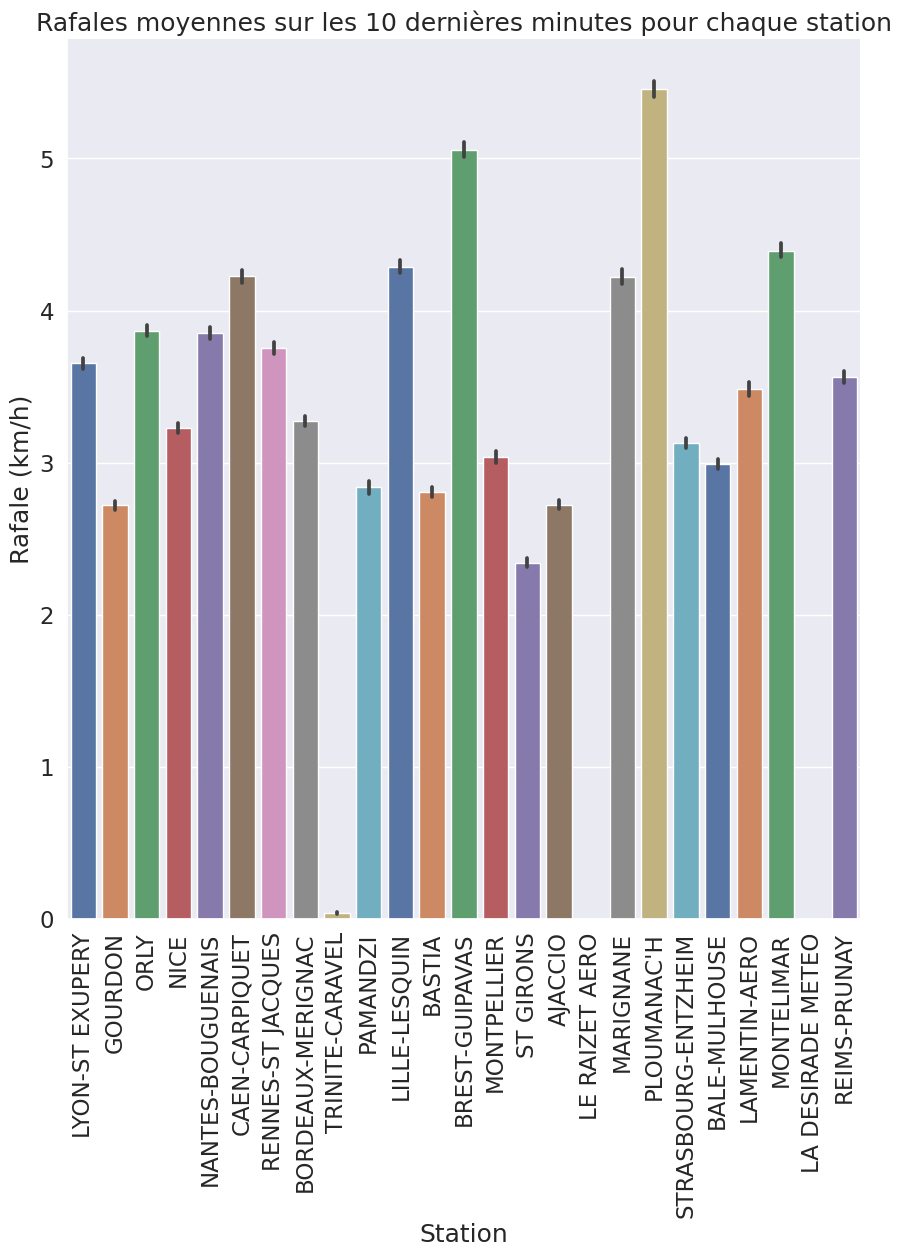

In [27]:
plt.figure(figsize = (20,20))
sns.catplot(x="Nom", y="Rafale sur les 10 dernières minutes",kind = "bar",height = 10, data = Data, palette="deep")
plt.title("Rafales moyennes sur les 10 dernières minutes pour chaque station")
plt.xlabel("Station")
plt.ylabel("Rafale (km/h)")
plt.xticks(rotation=90)
plt.show()

In [28]:
print("Moyenne des rafales dans les 10 dernières minutes : " + str(Data["Rafale sur les 10 dernières minutes"].mean())+" km/h") 

Moyenne des rafales dans les 10 dernières minutes : 3.261625006400082 km/h


Dans l'ensemble, les rafales moyennes de chaque station reste dans la même plage de valeur sauf pour **Trinite-Caravel** et **Le Raziet Aero**, mais cette différence est surêment liée au fait qu'il n'y a pas de capteur ou alors qu'il y a des problèmes. De plus, la valeur pour la station **Ploumanac'h** semble cohérente étant donné que cette station est sur le littoral.

**Affichage de la pression moyenne de chaque station en fonction de l'altitude** :

In [29]:
moy = Data.groupby("Nom").mean()[["Pression station","Altitude"]]
new_data = pd.DataFrame(data=moy)
new_data.head()

/tmp/ipykernel_68084/1069145229.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  moy = Data.groupby("Nom").mean()[["Pression station","Altitude"]]


,Pression station,Altitude
Nom,,
AJACCIO,101470.668058,5.0
BALE-MULHOUSE,98505.694943,263.0
BASTIA,101396.233593,10.0
BORDEAUX-MERIGNAC,101214.354694,47.0
BREST-GUIPAVAS,100519.320233,94.0


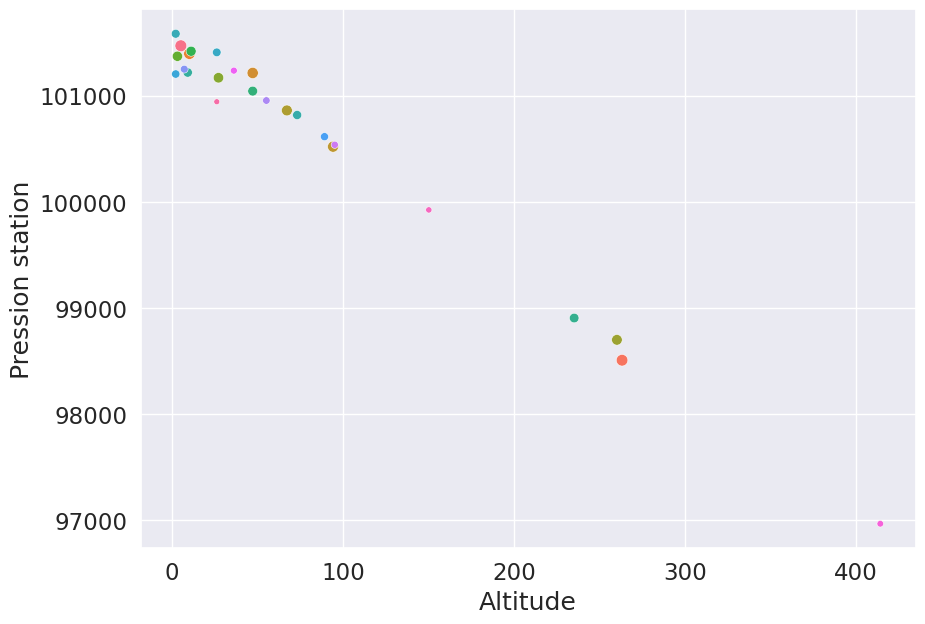

In [30]:
plt.figure(figsize = (10,7))
sns.scatterplot(x="Altitude", y="Pression station", hue="Nom", size="Nom", legend=False, data= new_data)
plt.show()

Ce que l'on remarque grâce à ce graphe c'est que plus nous sommes en altitude plus la pression atmosphérique est faible. Cette analyse est cohérente avec la réalité des choses.

**Affichage de la vitesse moyenne des rafales de chaque station en fonction de l'altitude** :

/tmp/ipykernel_68084/1827613007.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  raf_moy = Data.groupby("Nom").mean()[["Rafales sur une période","Altitude"]]


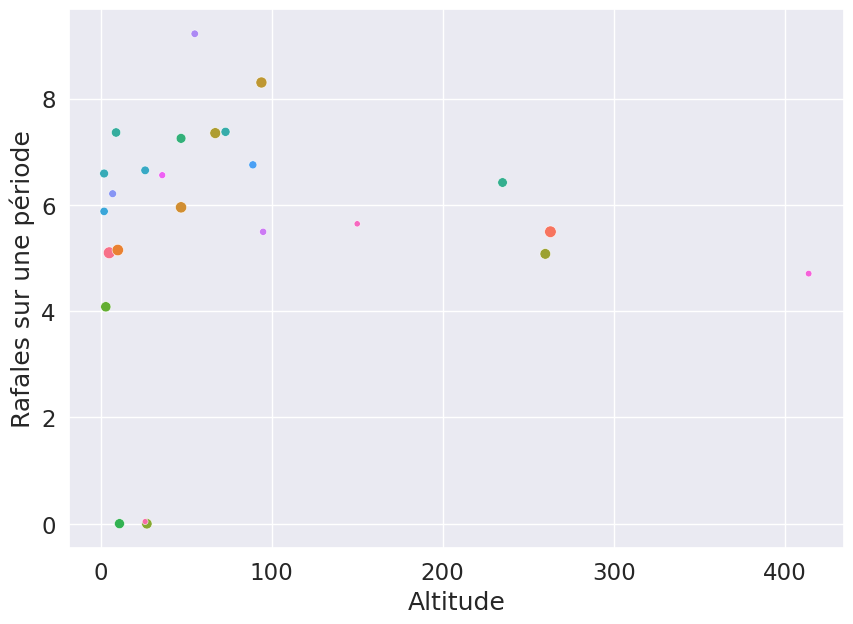

In [31]:
raf_moy = Data.groupby("Nom").mean()[["Rafales sur une période","Altitude"]]
df_raf = pd.DataFrame(data=raf_moy)
plt.figure(figsize = (10,7))
sns.scatterplot(x="Altitude", y="Rafales sur une période", hue="Nom", size="Nom", legend=False, data= df_raf)
plt.show() 

Ici, on remarque qu'il n'y a pas de lien entre la vitesse du vent et l'altitude. Ce que l'on pense n'est pas vérifié ici.

**Affichage de la température moyenne de chaque station en fonction de l'altitude** :

/tmp/ipykernel_68084/2440335527.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp_moy = Data.groupby("Nom").mean()[["Température (°C)","Altitude"]]


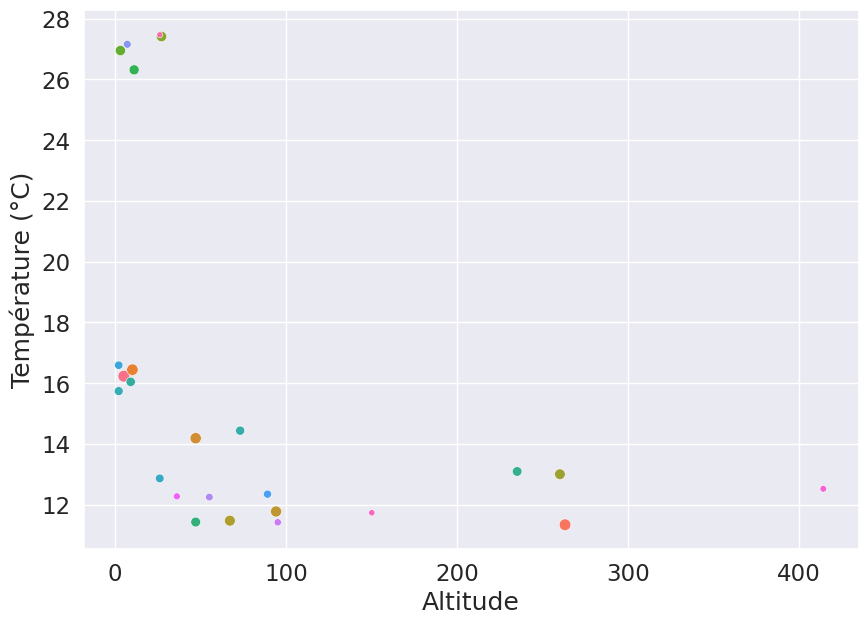

In [32]:
temp_moy = Data.groupby("Nom").mean()[["Température (°C)","Altitude"]]
df_temp = pd.DataFrame(data=temp_moy)
plt.figure(figsize = (10,7))
sns.scatterplot(x="Altitude", y="Température (°C)", hue="Nom", size="Nom", legend=False, data= df_temp)
plt.show() 

Ce graphique nous montre encore des valeurs qui sont cohérentes. En effet, on remarque dans l'ensemble que lorsque la station est proche de la mer, la température moyenne sera plus élevée. Cependant, on ne peut pas dire que plus nous sommes en altitude plus la température moyenne sera basse. En effet, on remarque que pour des stations à moins de 100 mètres d'altitude nous avons des températures moyennes inférieures à 12°C. De plus, notre intervalle d'étude pour l'altitude est assez faible, un peu plus de 400m, pour pouvoir prouver cette hypothèse. 

Pour conclure, la représentation de données nous a permis de prouver la cohérence de nos résultats et donc de nos valeurs. De plus, ces représentations ont permis de valider ou non des principes liés à la météorologie. 

# 4. Filtrage des mesures

Maintenant que nous avons vérifié l’ensemble des mesures et que notre jeu de données est bien mis en place, nous pouvons donc nous attaquer à la résolution de la **problématique**.

L’objectif ici est de supprimer toutes les mesures qui ne correspondent pas à des mesures de tempêtes. Pour cela je vais utiliser les différentes **caractéristiques des tempêtes** pour pouvoir **filtrer** mes mesures.

D’après les sources qui sont disponibles dans la rubrique **références**, j’ai pu réaliser cette **map mind** qui regroupe les différentes **caractéristiques d’une tempête**. 

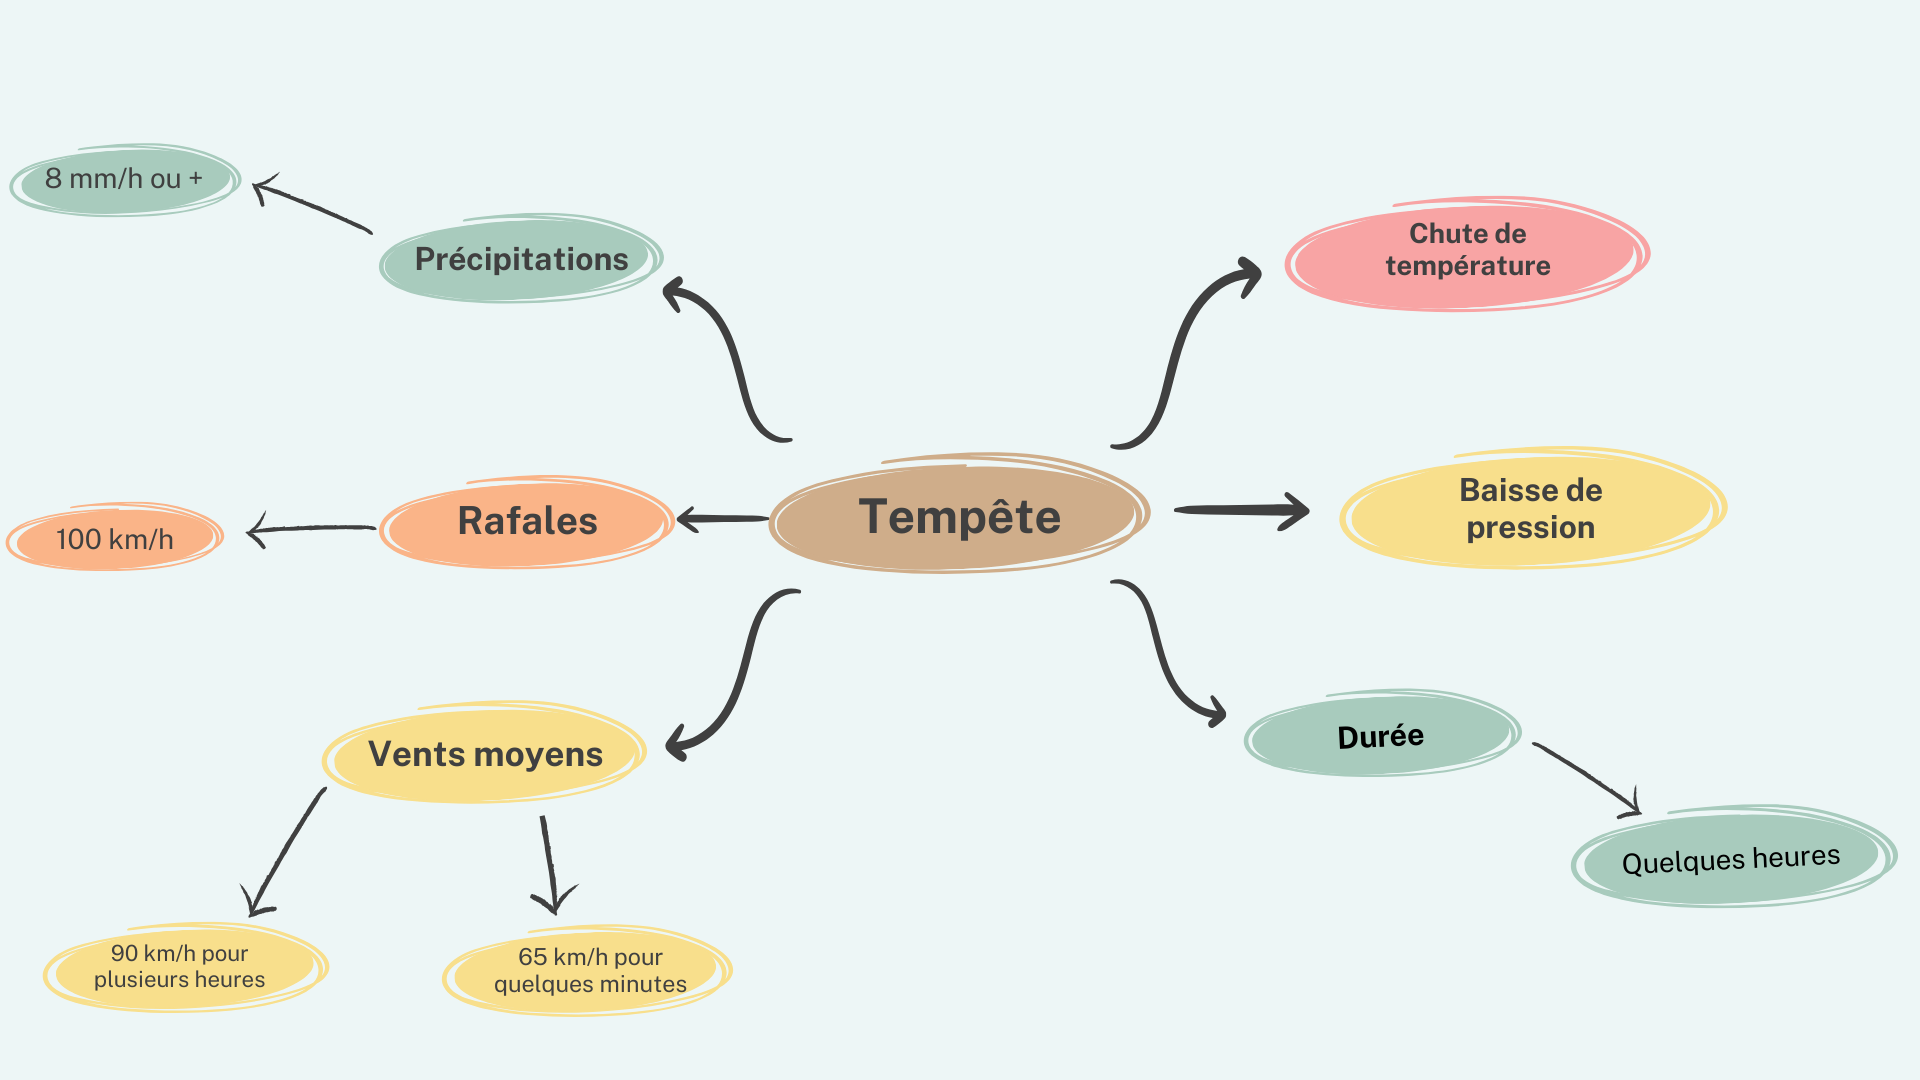

In [33]:
Image(filename='Mind map tempete.png')

D'après cette map mind, nous avons **6 caractéristiques** propres à la tempête, or elles n'ont pas besoin d'être toutes réunies pour pouvoir définir un phénomène comme étant une tempête. En effet, les rafales, les vents moyens ou alors les précipitations peuvent définir à elles seules un phénomène comme une tempête. Alors que pour les **3 données** de droite, il s'agit plus des **conséquences** d'une tempête.

**Filtrage pour les seuils de rafale et des vents moyens** :

Dans mon cas, je décide d'étudier les **rafales et les vents moyens** en même temps car ce sont deux caractéristiques qui sont **liées et indépendantes**.
Pour cela, je vais tout d'abord garder les mesures où les rafales sont supérieures au seuil et de même pour les vents moyens.
Ensuite, je vais **regrouper** les mesures qui sont supérieures au 2 seuils afin de pouvoir déterminer les dates où il y a eu des tempêtes.

En ce qui concerne notre caractéristique sur les rafales, nous avons un seuil à **100 km/h**, ce qui revient à environ **27,8 m/s**.

In [34]:
raf_sup_seuil = Data[Data["Rafale sur les 10 dernières minutes"] >= 27.8 ]
raf_sup_seuil.head(n=100)[["Rafale sur les 10 dernières minutes"]]

,Rafale sur les 10 dernières minutes
Date,
2010-02-28 01:00:00+01:00,29.3
2010-02-28 07:00:00+01:00,29.3
2010-02-28 10:00:00+01:00,28.3
2010-10-25 11:00:00+02:00,28.8
2010-10-25 14:00:00+02:00,28.8
...,...
2021-07-06 02:00:00+02:00,27.9
2021-10-21 02:00:00+02:00,27.9
2022-01-05 13:00:00+01:00,27.9


In [35]:
raf_sup_seuil["Rafale sur les 10 dernières minutes"].describe()

count    117.000000
mean      29.979487
std        2.607170
min       27.800000
25%       28.100000
50%       29.200000
75%       30.600000
max       43.200000
Name: Rafale sur les 10 dernières minutes, dtype: float64

De plus, une tempête est définie à partir du moment où les vents moyens atteignent au minimum **65 km/h** soit une vitesse de **18 m/s**. 

In [36]:
vent_sup_seuil = Data[Data["Vitesse du vent moyen 10 mn"] >= 18]
vent_sup_seuil.head()[["Vitesse du vent moyen 10 mn"]]

,Vitesse du vent moyen 10 mn
Date,
2010-01-28 10:00:00+01:00,18.0
2010-02-28 01:00:00+01:00,18.5
2010-05-15 20:00:00+02:00,18.0
2010-05-16 14:00:00+02:00,19.0
2010-10-25 11:00:00+02:00,20.1


In [37]:
vent_sup_seuil["Vitesse du vent moyen 10 mn"].describe()

count    189.000000
mean      19.255026
std        1.396401
min       18.000000
25%       18.300000
50%       19.000000
75%       19.600000
max       28.300000
Name: Vitesse du vent moyen 10 mn, dtype: float64

Je vais donc créer un nouveau **DataFrame** dans lequel il y a l'ensemble des mesures pour lesquelles la date est en commun entre les mesures de rafale et vents moyens supérieur à leur seuil respectif.

In [38]:
regroup = pd.merge(vent_sup_seuil, raf_sup_seuil, on="Date", how='inner')
regroup.head(n=65)

,mois_de_l_annee_x,Nom_x,region (name)_x,department (name)_x,department (code)_x,Latitude_x,Longitude_x,Altitude_x,Température_x,Température (°C)_x,...,Variation de pression en 24 heures_y,Direction du vent moyen 10 mn_y,Vitesse du vent moyen 10 mn_y,Rafale sur les 10 dernières minutes_y,Rafales sur une période_y,Periode de mesure de la rafale_y,Précipitations dans la dernière heure_y,Précipitations dans les 3 dernières heures_y,Précipitations dans les 12 dernières heures_y,Précipitations dans les 24 dernières heures_y
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-28 01:00:00+01:00,Février,BORDEAUX-MERIGNAC,Nouvelle-Aquitaine,Gironde,33,44.830667,-0.691333,47,292.25,19.1,...,NaN,210.0,18.5,29.3,29.3,-10.0,0.0,0.0,0.0,0.0
2010-10-25 11:00:00+02:00,Octobre,MARIGNANE,Provence-Alpes-Côte d'Azur,Bouches-du-Rhône,13,43.437667,5.216000,9,284.05,10.9,...,NaN,320.0,20.1,28.8,28.8,-10.0,0.2,0.2,0.0,0.0
2010-10-25 14:00:00+02:00,Octobre,MARIGNANE,Provence-Alpes-Côte d'Azur,Bouches-du-Rhône,13,43.437667,5.216000,9,283.45,10.3,...,NaN,10.0,13.4,28.8,28.8,-10.0,0.0,0.0,0.0,0.0
2011-12-16 01:00:00+01:00,Décembre,BREST-GUIPAVAS,Bretagne,Finistère,29,48.444167,-4.412000,94,286.65,13.5,...,NaN,240.0,19.5,30.4,32.4,-10.0,0.6,7.0,0.0,0.0
2011-12-24 16:00:00+01:00,Décembre,MARIGNANE,Provence-Alpes-Côte d'Azur,Bouches-du-Rhône,13,43.437667,5.216000,9,282.35,9.2,...,NaN,310.0,20.1,27.8,29.8,-10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-24 16:00:00+01:00,Novembre,MARIGNANE,Provence-Alpes-Côte d'Azur,Bouches-du-Rhône,13,43.437667,5.216000,9,287.05,13.9,...,-1250.0,330.0,21.4,27.9,28.4,-10.0,0.0,0.0,0.0,0.0
2023-11-24 19:00:00+01:00,Novembre,MARIGNANE,Provence-Alpes-Côte d'Azur,Bouches-du-Rhône,13,43.437667,5.216000,9,286.15,13.0,...,-1100.0,320.0,20.9,30.1,30.1,-10.0,0.0,0.0,0.0,0.0
2023-12-20 16:00:00+01:00,Décembre,MARIGNANE,Provence-Alpes-Côte d'Azur,Bouches-du-Rhône,13,43.437667,5.216000,9,284.35,11.2,...,-870.0,330.0,20.1,28.9,28.9,-10.0,0.0,0.0,0.0,0.0


In [39]:
e = list(regroup.columns)
print(e)

['mois_de_l_annee_x', 'Nom_x', 'region (name)_x', 'department (name)_x', 'department (code)_x', 'Latitude_x', 'Longitude_x', 'Altitude_x', 'Température_x', 'Température (°C)_x', 'Température minimale sur 12 heures (°C)_x', 'Température minimale sur 24 heures (°C)_x', 'Température maximale sur 12 heures (°C)_x', 'Température maximale sur 24 heures (°C)_x', 'Température minimale du sol sur 12 heures (en °C)_x', 'Pression au niveau mer_x', 'Variation de pression en 3 heures_x', 'Pression station_x', 'Variation de pression en 24 heures_x', 'Direction du vent moyen 10 mn_x', 'Vitesse du vent moyen 10 mn_x', 'Rafale sur les 10 dernières minutes_x', 'Rafales sur une période_x', 'Periode de mesure de la rafale_x', 'Précipitations dans la dernière heure_x', 'Précipitations dans les 3 dernières heures_x', 'Précipitations dans les 12 dernières heures_x', 'Précipitations dans les 24 dernières heures_x', 'mois_de_l_annee_y', 'Nom_y', 'region (name)_y', 'department (name)_y', 'department (code)_y', 

Nous avons ici un dataframe avec les colonnes en doublons, je vais donc les supprimer pour avoir un dataframe dans lequel les valeurs de vents moyens et de rafales sont supérieurs aux différents seuils.

In [40]:
colon_suppr = ['mois_de_l_annee_y', 'Nom_y', 'region (name)_y', 'department (name)_y', 'department (code)_y', 'Latitude_y', 'Longitude_y', 'Altitude_y', 'Température_y', 'Température (°C)_y', 'Température minimale sur 12 heures (°C)_y', 'Température minimale sur 24 heures (°C)_y', 'Température maximale sur 12 heures (°C)_y', 'Température maximale sur 24 heures (°C)_y', 'Température minimale du sol sur 12 heures (en °C)_y', 'Pression au niveau mer_y', 'Variation de pression en 3 heures_y', 'Pression station_y', 'Variation de pression en 24 heures_y', 'Direction du vent moyen 10 mn_y', 'Vitesse du vent moyen 10 mn_y', 'Rafale sur les 10 dernières minutes_y', 'Rafales sur une période_y', 'Periode de mesure de la rafale_y', 'Précipitations dans la dernière heure_y', 'Précipitations dans les 3 dernières heures_y', 'Précipitations dans les 12 dernières heures_y', 'Précipitations dans les 24 dernières heures_y']
regroup_clean = regroup.drop(columns=colon_suppr)
print(len(regroup_clean))
regroup_clean.head()

65


,mois_de_l_annee_x,Nom_x,region (name)_x,department (name)_x,department (code)_x,Latitude_x,Longitude_x,Altitude_x,Température_x,Température (°C)_x,...,Variation de pression en 24 heures_x,Direction du vent moyen 10 mn_x,Vitesse du vent moyen 10 mn_x,Rafale sur les 10 dernières minutes_x,Rafales sur une période_x,Periode de mesure de la rafale_x,Précipitations dans la dernière heure_x,Précipitations dans les 3 dernières heures_x,Précipitations dans les 12 dernières heures_x,Précipitations dans les 24 dernières heures_x
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-28 01:00:00+01:00,Février,BORDEAUX-MERIGNAC,Nouvelle-Aquitaine,Gironde,33,44.830667,-0.691333,47,292.25,19.1,...,NaN,210.0,18.5,29.3,29.3,-10.0,0.0,0.0,0.0,0.0
2010-10-25 11:00:00+02:00,Octobre,MARIGNANE,Provence-Alpes-Côte d'Azur,Bouches-du-Rhône,13,43.437667,5.216000,9,284.05,10.9,...,NaN,320.0,20.1,28.8,28.8,-10.0,0.2,0.2,0.0,0.0
2010-10-25 14:00:00+02:00,Octobre,MARIGNANE,Provence-Alpes-Côte d'Azur,Bouches-du-Rhône,13,43.437667,5.216000,9,283.45,10.3,...,NaN,330.0,18.0,24.2,25.2,-10.0,0.0,0.0,0.0,0.0
2011-12-16 01:00:00+01:00,Décembre,BREST-GUIPAVAS,Bretagne,Finistère,29,48.444167,-4.412000,94,286.65,13.5,...,NaN,240.0,19.5,30.4,32.4,-10.0,0.6,7.0,0.0,0.0
2011-12-24 16:00:00+01:00,Décembre,MARIGNANE,Provence-Alpes-Côte d'Azur,Bouches-du-Rhône,13,43.437667,5.216000,9,282.35,9.2,...,NaN,310.0,20.1,27.8,29.8,-10.0,0.0,0.0,0.0,0.0


In [41]:
nouveaux_noms = {col: col.replace('_x', '') for col in regroup_clean.columns}
regroup_clean.rename(columns= nouveaux_noms, inplace=True) 
regroup_clean.head()

,mois_de_l_annee,Nom,region (name),department (name),department (code),Latitude,Longitude,Altitude,Température,Température (°C),...,Variation de pression en 24 heures,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Rafale sur les 10 dernières minutes,Rafales sur une période,Periode de mesure de la rafale,Précipitations dans la dernière heure,Précipitations dans les 3 dernières heures,Précipitations dans les 12 dernières heures,Précipitations dans les 24 dernières heures
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-28 01:00:00+01:00,Février,BORDEAUX-MERIGNAC,Nouvelle-Aquitaine,Gironde,33,44.830667,-0.691333,47,292.25,19.1,...,NaN,210.0,18.5,29.3,29.3,-10.0,0.0,0.0,0.0,0.0
2010-10-25 11:00:00+02:00,Octobre,MARIGNANE,Provence-Alpes-Côte d'Azur,Bouches-du-Rhône,13,43.437667,5.216000,9,284.05,10.9,...,NaN,320.0,20.1,28.8,28.8,-10.0,0.2,0.2,0.0,0.0
2010-10-25 14:00:00+02:00,Octobre,MARIGNANE,Provence-Alpes-Côte d'Azur,Bouches-du-Rhône,13,43.437667,5.216000,9,283.45,10.3,...,NaN,330.0,18.0,24.2,25.2,-10.0,0.0,0.0,0.0,0.0
2011-12-16 01:00:00+01:00,Décembre,BREST-GUIPAVAS,Bretagne,Finistère,29,48.444167,-4.412000,94,286.65,13.5,...,NaN,240.0,19.5,30.4,32.4,-10.0,0.6,7.0,0.0,0.0
2011-12-24 16:00:00+01:00,Décembre,MARIGNANE,Provence-Alpes-Côte d'Azur,Bouches-du-Rhône,13,43.437667,5.216000,9,282.35,9.2,...,NaN,310.0,20.1,27.8,29.8,-10.0,0.0,0.0,0.0,0.0


La manupilation précédente a permis de renommer l'ensemble des colonnes en supprimant le '_x'.

In [42]:
vent_raf = regroup_clean.copy()
region = vent_raf.groupby("region (name)")
region.size()

region (name)
Auvergne-Rhône-Alpes           1
Bretagne                      14
Corse                          7
Grand Est                      1
Hauts-de-France                4
Normandie                      4
Nouvelle-Aquitaine             3
Pays de la Loire               1
Provence-Alpes-Côte d'Azur    30
dtype: int64

In [43]:
PACA = vent_raf[vent_raf["region (name)"] == "Provence-Alpes-Côte d'Azur"]
PACA.head(n=30)[["mois_de_l_annee", "Nom","Rafale sur les 10 dernières minutes", "Vitesse du vent moyen 10 mn"]]

,mois_de_l_annee,Nom,Rafale sur les 10 dernières minutes,Vitesse du vent moyen 10 mn
Date,,,,
2010-10-25 11:00:00+02:00,Octobre,MARIGNANE,28.8,20.1
2010-10-25 14:00:00+02:00,Octobre,MARIGNANE,24.2,18.0
2011-12-24 16:00:00+01:00,Décembre,MARIGNANE,27.8,20.1
2011-12-29 16:00:00+01:00,Décembre,MARIGNANE,28.3,20.6
2012-10-28 07:00:00+01:00,Octobre,MARIGNANE,31.4,20.6
2013-02-02 13:00:00+01:00,Février,MARIGNANE,32.9,22.1
2013-03-06 10:00:00+01:00,Mars,MARIGNANE,27.8,18.0
2013-03-14 10:00:00+01:00,Mars,MARIGNANE,27.8,19.0
2013-03-14 13:00:00+01:00,Mars,MARIGNANE,30.9,23.1


Le résultat est surprenant étant donné que la région **PACA** n'est pas forcément une région très connue pour subir beaucoup de tempête, cependant ce résultat ne semble **pas aberrant** car certaines caractéristiques peuvent prouver ce résultat. En effet, la station **Marignane** se situe proche de la **mer Méditerranée** qui est bien connue pour ses **mistrals** et ses **vents de l'Est**. Ainsi, on en déduit que ces résultats sont causés par la proximité de la station avec la mer. Cependant, on peut en déduire que ces mesures sont des mesures liées à des tempêtes mais qui sont moins importantes qu'à la normale. 

In [44]:
Breizh = vent_raf[vent_raf["region (name)"] == "Bretagne"]
Breizh.head()[["mois_de_l_annee", "Nom","Rafale sur les 10 dernières minutes", "Vitesse du vent moyen 10 mn", "Altitude"]]

,mois_de_l_annee,Nom,Rafale sur les 10 dernières minutes,Vitesse du vent moyen 10 mn,Altitude
Date,,,,,
2011-12-16 01:00:00+01:00,Décembre,BREST-GUIPAVAS,30.4,19.5,94
2013-03-11 16:00:00+01:00,Mars,PLOUMANAC'H,27.8,21.1,55
2013-12-23 13:00:00+01:00,Décembre,BREST-GUIPAVAS,27.8,18.0,94
2013-12-23 22:00:00+01:00,Décembre,BREST-GUIPAVAS,29.3,20.1,94
2013-12-24 01:00:00+01:00,Décembre,BREST-GUIPAVAS,36.5,19.5,94


On remarque aussi que la **Bretagne** dépasse souvent le seuil mais cette fois-ci ce résultat n'est pas surprenant étant donné que cette région est connue pour avoir beaucoup de tempêtes dû à sa proximité avec l'océan Atlantique.

In [45]:
region.size()

region (name)
Auvergne-Rhône-Alpes           1
Bretagne                      14
Corse                          7
Grand Est                      1
Hauts-de-France                4
Normandie                      4
Nouvelle-Aquitaine             3
Pays de la Loire               1
Provence-Alpes-Côte d'Azur    30
dtype: int64

D'après les résultats précédents, on remarque que les régions qui sont le plus touchées par des vents moyens et des rafales supérieures aux seuils sont : **Provence-Alpes-Côte d'Azur, Bretagne, Corse, Hauts-de-France, Normandie** et **Nouvelle-Aquitaine**.

**Filtrage pour le seuil de précipitation** :

Dans ce cas-là, je décide d'étudier en même temps les précipitations ainsi que la durée d'une tempête qui est de quelques heures, soit environ **3 heures**.
Étudier seulement les précipitations me permettra d'identifier la présence de tempête ou pas étant donné que les précipitations font parties des caractéristiques d'une tempête. 

Ainsi, je vais pouvoir étudier **les précipitations qui se sont passées dans les 3 dernières heures** afin d'identifier de potentielles tempêtes.

D'après la carte mentale, une tempête est définie si il y a **8 mm ou plus par heure**. Dans notre cas, nous voulons étudier les précipitations sur 3 heures. Pour cela notre seuil va donc être de **24 mm pour 3 heures**. 

In [46]:
precipitation = Data[Data["Précipitations dans les 3 dernières heures"] >= 24]
print(len(precipitation))
precipitation.head()[["Précipitations dans les 3 dernières heures","region (name)", "Nom"]]

536


,Précipitations dans les 3 dernières heures,region (name),Nom
Date,,,
2010-01-04 04:00:00+01:00,34.0,Mayotte,PAMANDZI
2010-01-07 10:00:00+01:00,47.0,Mayotte,PAMANDZI
2010-02-16 22:00:00+01:00,24.0,Corse,BASTIA
2010-06-09 23:00:00+02:00,28.0,Grand Est,STRASBOURG-ENTZHEIM
2010-06-10 23:00:00+02:00,27.0,Normandie,CAEN-CARPIQUET


In [47]:
precipitation["Précipitations dans les 3 dernières heures"].describe()

count    536.000000
mean      36.784328
std       16.634316
min       24.000000
25%       26.700000
50%       31.900000
75%       40.600000
max      201.000000
Name: Précipitations dans les 3 dernières heures, dtype: float64

In [48]:
region_precip = precipitation.groupby("region (name)")
region_precip.size()

region (name)
Auvergne-Rhône-Alpes           59
Bretagne                        9
Corse                          41
Grand Est                      15
Guadeloupe                     73
Hauts-de-France                 7
Martinique                     91
Mayotte                       101
Normandie                       4
Nouvelle-Aquitaine             10
Occitanie                      56
Pays de la Loire                4
Provence-Alpes-Côte d'Azur     55
Île-de-France                  11
dtype: int64

Finalement, nous avons **536 mesures** supérieures au seuil de précipitation. Ce résultat ne paraît pas aberrant étant donné que les phénomènes météorologiques liés à la pluie sont bien plus récurrents que ceux liés à des vents forts.

**Regroupement des mesures présentant des tempêtes** :

L'objectif ici est juste de créer un nouveau **DataFrame** qui **regroupe** l'ensemble des mesures supérieures aux seuils de vents moyens, rafales et aussi de précipitation. 

In [49]:
regroup_seuil = pd.concat([vent_raf, precipitation]).sort_index()
print(len(regroup_seuil))
regroup_seuil.head(n=1000)

601


,mois_de_l_annee,Nom,region (name),department (name),department (code),Latitude,Longitude,Altitude,Température,Température (°C),...,Variation de pression en 24 heures,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Rafale sur les 10 dernières minutes,Rafales sur une période,Periode de mesure de la rafale,Précipitations dans la dernière heure,Précipitations dans les 3 dernières heures,Précipitations dans les 12 dernières heures,Précipitations dans les 24 dernières heures
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04 04:00:00+01:00,Janvier,PAMANDZI,Mayotte,Mayotte,976,-12.805500,45.282833,7,298.95,25.8,...,0.0,330.0,3.1,0.0,8.2,-10.0,12.0,34.0,0.0,0.0
2010-01-07 10:00:00+01:00,Janvier,PAMANDZI,Mayotte,Mayotte,976,-12.805500,45.282833,7,300.25,27.1,...,10.0,20.0,1.0,0.0,7.2,-10.0,6.0,47.0,0.0,0.0
2010-02-16 22:00:00+01:00,Février,BASTIA,Corse,Haute-Corse,2b,42.540667,9.485167,10,282.35,9.2,...,NaN,10.0,2.6,0.0,5.1,-10.0,6.0,24.0,0.0,0.0
2010-02-28 01:00:00+01:00,Février,BORDEAUX-MERIGNAC,Nouvelle-Aquitaine,Gironde,33,44.830667,-0.691333,47,292.25,19.1,...,NaN,210.0,18.5,29.3,29.3,-10.0,0.0,0.0,0.0,0.0
2010-06-09 23:00:00+02:00,Juin,STRASBOURG-ENTZHEIM,Grand Est,Bas-Rhin,67,48.549500,7.640333,150,290.85,17.7,...,NaN,10.0,5.7,0.0,13.4,-10.0,0.8,28.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-18 10:00:00+01:00,Janvier,PAMANDZI,Mayotte,Mayotte,976,-12.805500,45.282833,7,298.85,25.7,...,-100.0,310.0,7.5,11.8,11.8,-10.0,21.5,27.6,62.0,62.0
2024-01-25 04:00:00+01:00,Janvier,PAMANDZI,Mayotte,Mayotte,976,-12.805500,45.282833,7,299.35,26.2,...,-60.0,250.0,9.1,11.9,11.9,-10.0,5.1,40.4,46.6,0.0
2024-01-30 07:00:00+01:00,Janvier,TRINITE-CARAVEL,Martinique,Martinique,972,14.774500,-60.875333,26,296.75,23.6,...,-80.0,250.0,4.0,9.2,9.9,-10.0,2.4,25.6,33.7,34.7


Nous avons ici l'ensemble des mesures qui correspondent à des tempêtes d'après le seuil des différentes caractéristiques.

In [50]:
region_total = regroup_seuil.groupby(["region (name)"])
region_total.size()

region (name)
Auvergne-Rhône-Alpes           60
Bretagne                       23
Corse                          48
Grand Est                      16
Guadeloupe                     73
Hauts-de-France                11
Martinique                     91
Mayotte                       101
Normandie                       8
Nouvelle-Aquitaine             13
Occitanie                      56
Pays de la Loire                5
Provence-Alpes-Côte d'Azur     85
Île-de-France                  11
dtype: int64

Afin de filtrer encore plus nos mesures, on va utiliser une conséquence des tempêtes qui est la chute de pression.
Je vais donc utiliser la donnée **"Variation de pression en 3 heures"** pour pouvoir réduire le nombre de mesures correspondant à des tempêtes.

In [51]:
chute_pression = regroup_seuil[regroup_seuil["Variation de pression en 3 heures"] < 0]
print(len(chute_pression))
chute_pression.head()[["Variation de pression en 3 heures"]]

226


,Variation de pression en 3 heures
Date,
2010-06-15 20:00:00+02:00,-190.0
2010-08-14 17:00:00+02:00,-20.0
2010-09-06 11:00:00+02:00,-80.0
2010-09-07 02:00:00+02:00,-80.0
2010-10-02 20:00:00+02:00,-170.0


Nous sommes passé de **536 mesures** à **226 mesures**.

Afin de filtrer encore plus il faut étudier la caractéristique de **baisse de température**. Cependant nous n'avons pas de données de variation de température disponible.

Je pensais pouvoir calculer cette variation de température en faisant la température maximale sur **12 heures moins la température minimale**. Le problème est que cette variation est sur une période de temps trop longues par rapport à 3 heures, mais aussi que je ne peux pas savoir s' il s'agit d'une **baisse de température ou une augmentation**. Il m'est donc **impossible** de filtrer encore plus les mesures avec les données qu'ils me restent.

# 5. Traitement des mesures indiquant des tempêtes

In [52]:
tempetes = chute_pression.copy()

**Affichage du nombre de tempête par station** :

In [53]:
ordered_genres= tempetes["Nom"].value_counts().index.tolist()
tempetes.groupby("Nom").size()

Nom
AJACCIO                 6
BASTIA                 15
BORDEAUX-MERIGNAC       4
BREST-GUIPAVAS         10
CAEN-CARPIQUET          4
GOURDON                 2
LAMENTIN-AERO          26
LE RAIZET AERO         22
LILLE-LESQUIN           3
LYON-ST EXUPERY         3
MARIGNANE              33
MONTELIMAR             12
MONTPELLIER            15
NANTES-BOUGUENAIS       2
NICE                   18
PAMANDZI               44
PLOUMANAC'H             3
ST GIRONS               2
STRASBOURG-ENTZHEIM     2
dtype: int64

Text(0.5, 1.0, 'Nombre de tempête par station')

<Figure size 1000x1000 with 0 Axes>

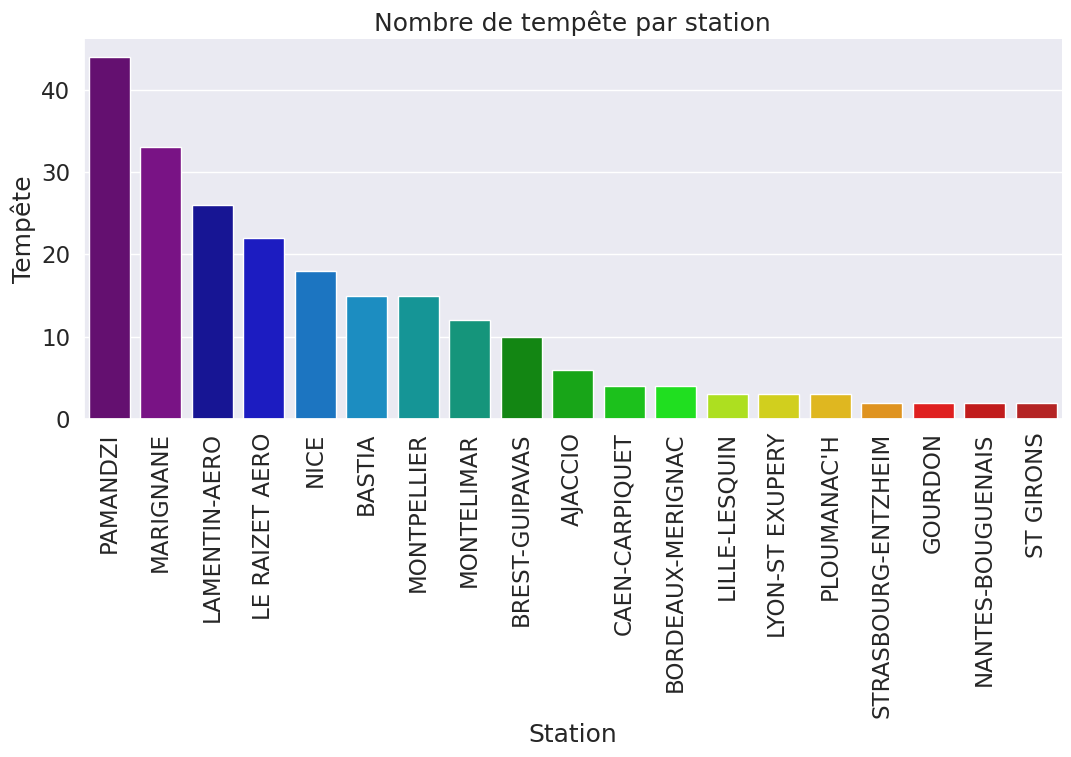

In [54]:
plt.figure(figsize=(10,10))
sns.catplot(x="Nom", kind="count", data= tempetes,order=ordered_genres, height = 5, aspect = 2.3,palette = 'nipy_spectral')
plt.xlabel('Station')
plt.ylabel('Tempête')
plt.xticks(rotation = 90)
plt.title("Nombre de tempête par station")

**Affichage du nombre de tempête par région** :

In [55]:
ordered_genres1= tempetes["region (name)"].value_counts().index.tolist()
tempetes.groupby("region (name)").size()

region (name)
Auvergne-Rhône-Alpes          15
Bretagne                      13
Corse                         21
Grand Est                      2
Guadeloupe                    22
Hauts-de-France                3
Martinique                    26
Mayotte                       44
Normandie                      4
Nouvelle-Aquitaine             4
Occitanie                     19
Pays de la Loire               2
Provence-Alpes-Côte d'Azur    51
dtype: int64

Text(0.5, 1.0, 'Nombre de tempête par région')

<Figure size 1000x1000 with 0 Axes>

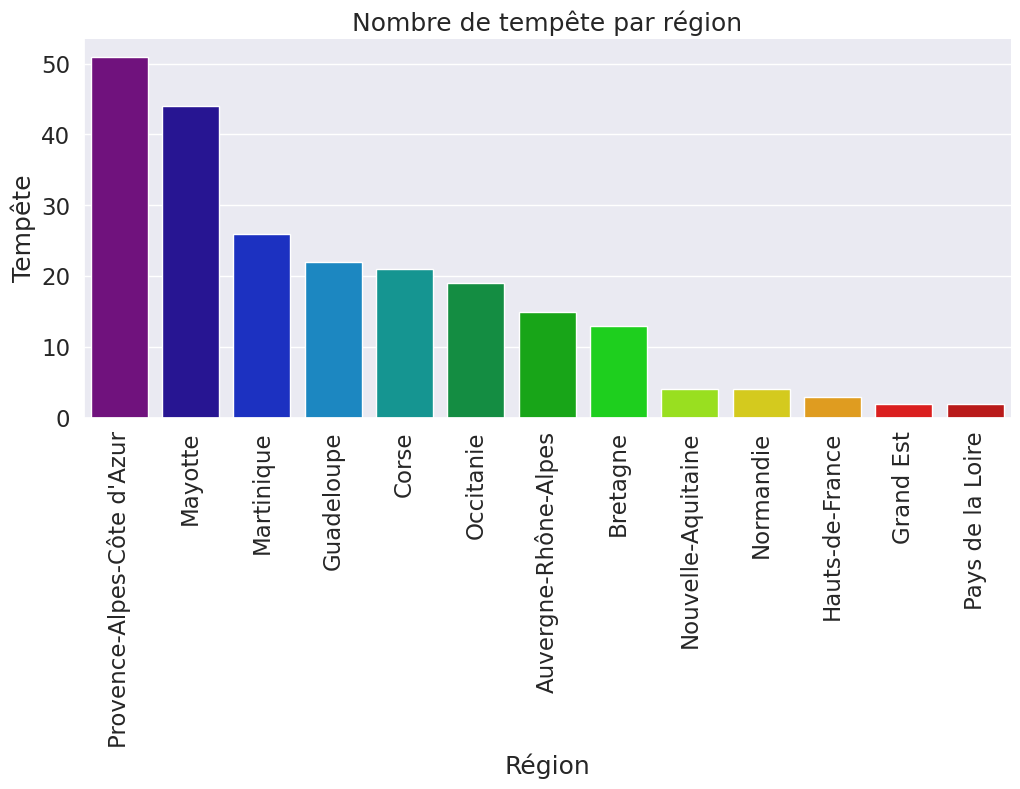

In [56]:
plt.figure(figsize=(10,10))
sns.catplot(x="region (name)", kind="count", data= tempetes, order=ordered_genres1, height = 5, aspect = 2.3,palette = 'nipy_spectral')
plt.xlabel('Région')
plt.ylabel('Tempête')
plt.xticks(rotation = 90)
plt.title("Nombre de tempête par région")

Ainsi nous pouvons dire que les 5 régions les plus touchées en France par des tempêtes depuis 2010 sont les suivantes : **Provence-Alpes-Côte d'Azur, Mayotte, Martinique, Guadeloupe et la Corse**. 

Ce qui est surprenant dans ce résultat est le fait que la région Provence-Alpes-Côte d'Azur soit la première région ayant le plus de tempête depuis 2010 alors que cette région est plutôt connue pour son climat méditerranéen, c'est-à-dire chaud avec beaucoup de soleil.

De plus, il est important de noter que dans cette étude nous impliquons les **DROM-COM**, or ces régions là ne se situent pas au même endroit que la France géographiquement. Ainsi, ces régions sont plus sujettes à des **climats tropicaux** menant à des **tempêtes plus sévères** qu'en France. C'est donc pour cela que ces régions sont dans les 5 premières. Il serait donc intéressant de regarder les régions de **France métropolitaine uniquement**.

**Affichage nombre de tempête par région en France métropolitaine** :

Pour réaliser cette étude il faut enlever des données les mesures liées aux régions suivantes : **Mayotte, Martinique et Guadeloupe**.

In [57]:
cond1 = tempetes["region (name)"] == "Mayotte"
cond2 = tempetes["region (name)"] == "Martinique"
cond3 = tempetes["region (name)"] == "Guadeloupe"
France_metro = tempetes[~(cond1|cond2|cond3)]
ordered_genres2= France_metro["region (name)"].value_counts().index.tolist()
France_metro.groupby("region (name)").size()

region (name)
Auvergne-Rhône-Alpes          15
Bretagne                      13
Corse                         21
Grand Est                      2
Hauts-de-France                3
Normandie                      4
Nouvelle-Aquitaine             4
Occitanie                     19
Pays de la Loire               2
Provence-Alpes-Côte d'Azur    51
dtype: int64

Text(0.5, 1.0, 'Nombre de tempête par région en France métropolitaine')

<Figure size 1000x1000 with 0 Axes>

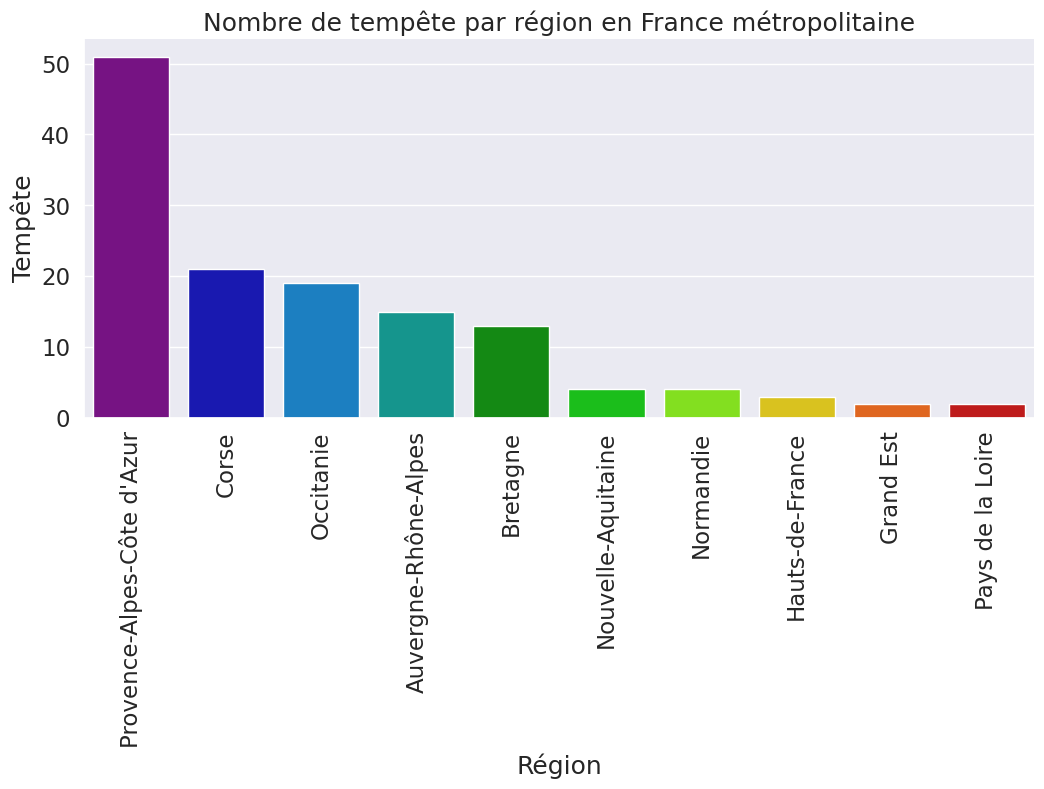

In [58]:
plt.figure(figsize=(10,10))
sns.catplot(x="region (name)", kind="count", data= France_metro, order=ordered_genres2, height = 5, aspect = 2.3,palette = 'nipy_spectral')
plt.xlabel('Région')
plt.ylabel('Tempête')
plt.xticks(rotation = 90)
plt.title("Nombre de tempête par région en France métropolitaine")

Ainsi, on remarque cette fois-ci que les 5 régions qui subissent le plus de tempêtes en France métropolitaine depuis 2010 sont : **Provence-Alpes-Côte d'Azur, Corse, Occitanie, Auvergne-Rhône-Alpes et Bretagne**. Le résultat sur ce top 5 semblent cohérent mise à part pour la région **PACA**.

Ainsi, nous pouvons répondre à la **problématique**. En effet, d’après ce jeu de données nous pouvons affirmer que en France métropolitaine les **5 régions** ayant eu le plus de tempêtes depuis 2010 sont les suivantes : **Provence-Alpes-Côte d'Azur, Corse, Occitanie, Auvergne-Rhône-Alpes et Bretagne**. 

Maintenant que nous avons répondu à la problématique il serait intéressant de développer en se demandant **si ce top 5 des régions restera le même d’ici 2030 ou va-t-il changer ?**

# 6. Prédiction du Top 5 en 2030

L'objectif maintenant est d'étudier plus en profondeur l'apparition de ces tempêtes pour pouvoir potentiellement prédire si le nombre de tempêtes augmentent ou pas.

Nous allons tout d'abord réduire le DataFrame en **supprimant toutes les mesures qui ne sont pas liées à ces 5 régions**. Je décide de ne pas étudier les **régions outre-mer** étant donné que le **climat est différent** et donc que les caractéristiques de tempête sont différentes.

In [59]:
condition1 = France_metro["region (name)"] == "Nouvelle-Aquitaine"
condition2 = France_metro["region (name)"] == "Normandie"
condition3 = France_metro["region (name)"] == "Hauts-de-France"
condition4 = France_metro["region (name)"] == "Grand Est"
condition5 = France_metro["region (name)"] == "Pays de la Loire"
top5_regions = France_metro[~(condition1|condition2|condition3|condition4|condition5)]
top5_regions.groupby("region (name)").size()

region (name)
Auvergne-Rhône-Alpes          15
Bretagne                      13
Corse                         21
Occitanie                     19
Provence-Alpes-Côte d'Azur    51
dtype: int64

Nous avons maintenant que les mesures liées aux **5 régions** où les tempêtes sont les plus récurrentes.

Je vais tout d'abord vérifier que chaque mesure correspond bien à une tempête, c'est-à-dire que nous n'avons pas **2 mesures pour la même région où l'intervalle de temps est de 3 heures**.

In [60]:
time = top5_regions[top5_regions["region (name)"] == "Corse"]
time.head(n=21)[["mois_de_l_annee","region (name)"]]

,mois_de_l_annee,region (name)
Date,,
2010-06-15 20:00:00+02:00,Juin,Corse
2011-11-05 04:00:00+01:00,Novembre,Corse
2012-09-04 20:00:00+02:00,Septembre,Corse
2012-10-01 14:00:00+02:00,Octobre,Corse
2013-11-04 19:00:00+01:00,Novembre,Corse
2014-07-26 17:00:00+02:00,Juillet,Corse
2015-03-16 22:00:00+01:00,Mars,Corse
2015-10-01 20:00:00+02:00,Octobre,Corse
2015-10-02 05:00:00+02:00,Octobre,Corse


On remarque pour la **Corse** qu'il y a deux mesures prise avec un intervalle de temps de **3 heures**, je suppose donc qu'il s'agit de la même tempête. Il s'agit des mesures datant du **1er Novembre 2018 à 1 heure et 4 heures**.

Je vais donc supprimer une de ces 2 mesures. Je choisis de supprimer la mesure prise à 4 heures.

In [61]:
index_a_supprimer = pd.to_datetime('2018-11-01 04:00:00+01:00')
top5_regions = top5_regions.drop(index_a_supprimer)
top5_regions.head(n=21)[["mois_de_l_annee","region (name)"]]

,mois_de_l_annee,region (name)
Date,,
2010-06-15 20:00:00+02:00,Juin,Corse
2010-08-14 17:00:00+02:00,Août,Provence-Alpes-Côte d'Azur
2010-09-06 11:00:00+02:00,Septembre,Bretagne
2010-09-07 02:00:00+02:00,Septembre,Occitanie
2010-10-02 20:00:00+02:00,Octobre,Bretagne
2010-10-25 11:00:00+02:00,Octobre,Provence-Alpes-Côte d'Azur
2010-10-25 14:00:00+02:00,Octobre,Provence-Alpes-Côte d'Azur
2010-10-30 14:00:00+02:00,Octobre,Occitanie
2010-10-31 13:00:00+01:00,Octobre,Provence-Alpes-Côte d'Azur


J'ai donc réalisé cette manipulation pour toutes les autres régions afin de supprimer tous les doublons. Des doublons sont apparus uniquement dans la région **Provence-Alpes-Côte d'Azur**, cependant il y avait **7 doublons**, ce qui réduit le nombre de tempête de cette région. Après réflexion, il aurait été bien de faire cette manipulation avant de classer et de définir le top 5 des régions. Or ce problème ne modifie pas le résultat final, mais dans le cas d'une étude plus poussée il faudrait réaliser cette manipulation bien avant.

In [62]:
print(len(top5_regions))
top5_regions.groupby("region (name)").size()

118


region (name)
Auvergne-Rhône-Alpes          15
Bretagne                      13
Corse                         20
Occitanie                     19
Provence-Alpes-Côte d'Azur    51
dtype: int64

Nous avons maintenant **110 mesures** qui correspondent aux nombres de tempêtes qu'il s'est passé dans les 5 régions depuis 2010.  

**L'objectif** maintenant est d'afficher pour chaque région **l'évolution temporelle des tempêtes** et de voir si il est possible de réaliser une **prédiction**.

Je commence avec la région **Provence-Alpes-Côte d'Azur** :

**Provence-Alpes-Côte d'Azur** :

In [63]:
PACA = top5_regions[top5_regions["region (name)"] == "Provence-Alpes-Côte d'Azur"]
mesures = pd.DataFrame(PACA)
mesures.index = pd.to_datetime(mesures.index, utc=True)
mesures['Année'] = mesures.index.year
result = mesures.groupby('Année').size()

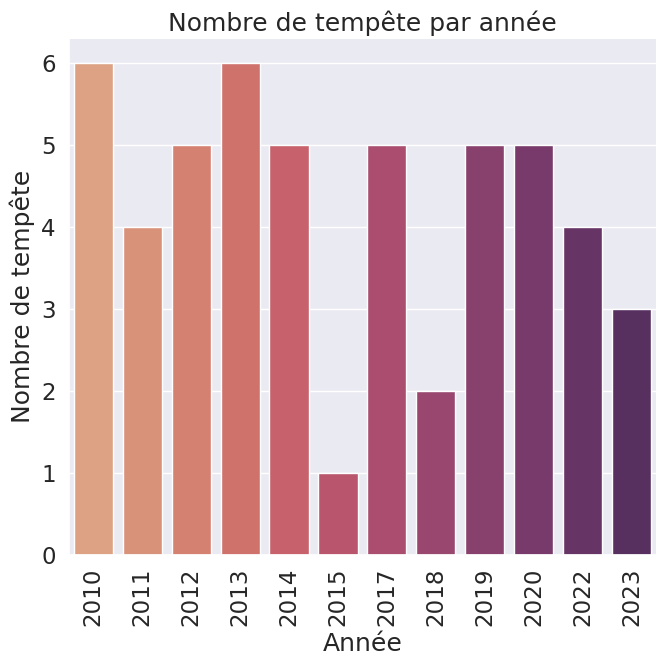

In [64]:
sns.catplot( data=mesures, x='Année', kind="count",height=7, palette="flare")
plt.xlabel("Année")
plt.ylabel("Nombre de tempête")
plt.title("Nombre de tempête par année")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

Ici nous affichons le nombre de tempête qui se sont réalisées pour chaque année dans la région **Provence-Alpes-Côte d'Azur**.

L'affichage des mêmes valeurs à l'aide d'une courbe serait plus facile, nous avons donc la courbe suivante :

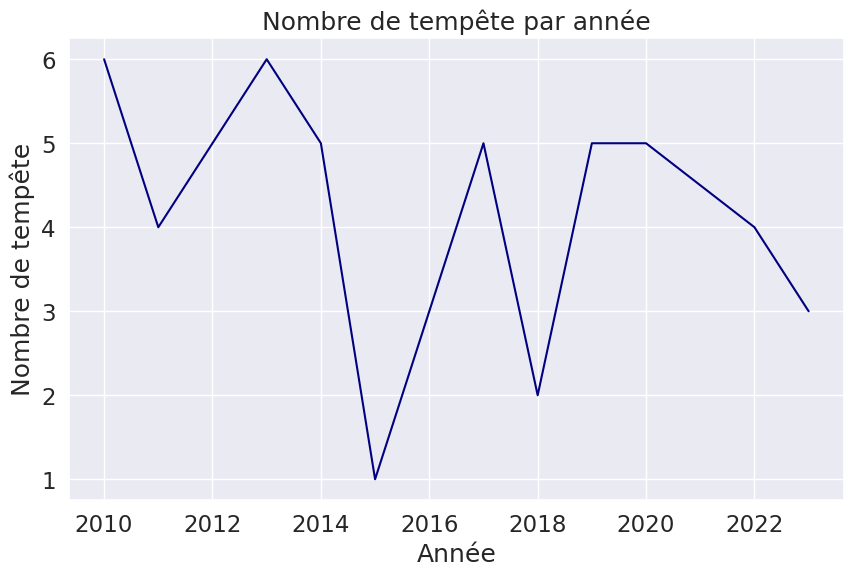

In [65]:
plt.figure(figsize=(10, 6))
result.plot(color = "navy", label ="données")
plt.xlabel('Année')
plt.ylabel('Nombre de tempête')
plt.title('Nombre de tempête par année')
plt.show()

On réalise maintenant une **régression linéaire** sur ce graphe.

Tout d'abord, je créer un DataFrame de ma série **result** qui comporte uniquement le nombre de tempête par année. J'utilise pour ça la fonction suivante :

In [66]:
def create_dataframe(series, column_name):
    df = pd.DataFrame({column_name: series})
    return df

Estimation : a = -0.1 et b = 244.4


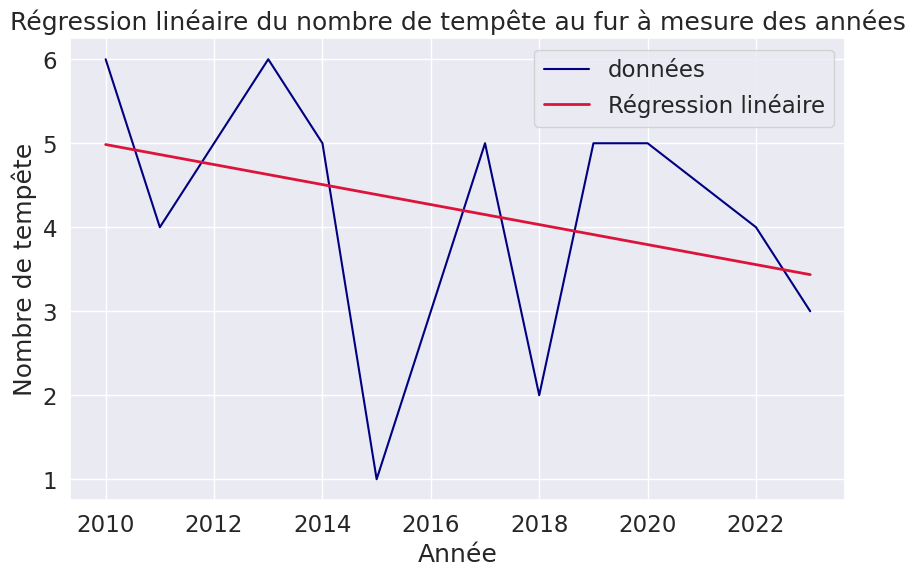

In [67]:
df = create_dataframe(result, 'Valeur')
X = df.index.values.reshape(-1, 1)  
Y = df['Valeur'].values 

model = LinearRegression()
fct = model.fit(X, Y)
y_pred = model.predict(X)
print("Estimation : a = %.1f" %fct.coef_[0] + " et b = %.1f" %fct.intercept_)


plt.figure(figsize=(10, 6))
result.plot(color = "navy", label ="données")
plt.plot(X, y_pred, color='crimson', linewidth=2, label='Régression linéaire')
plt.xlabel('Année')
plt.ylabel('Nombre de tempête')
plt.title('Régression linéaire du nombre de tempête au fur à mesure des années')
plt.legend()
plt.show()

Nous avons ici une **régression linéaire** du nombre de tempête au fur à mesure des années pour la région **Provence-Alpes-Côte d'Azur**.
On remarque ici que notre régression linéaire est **décroissante**. 

Nous allons maintenant chercher à réaliser une **prédiction** du nombre de tempête qu'il y aura dans les prochaines années.

Pour cela je choisis de réaliser une prédiction sur plusieur années, je vais donc prolonger mon étude jusqu'à **2030**. 

In [68]:
X_PACA = [[2030]]
PACAX = model.predict(X_PACA)
print(PACAX)

[2.60210697]


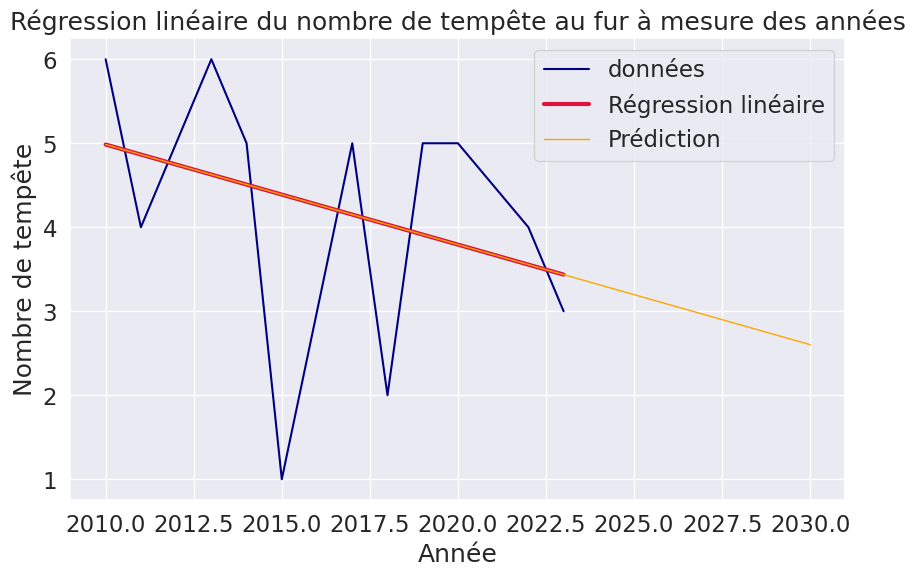

In [69]:
nouvelles_années = np.array([[2024], [2025], [2026], [2027], [2028], [2029], [2030]])
X2 = np.concatenate((X, nouvelles_années))

linear_regressor = LinearRegression(copy_X=True, fit_intercept=True)
fct = linear_regressor.fit(X, Y)
y_pred =  fct.intercept_ + X*fct.coef_[0]

plt.figure(figsize=(10, 6))
result.plot(color = "navy", label ="données")
plt.plot(X, y_pred, color='crimson', linewidth=3, label='Régression linéaire')
plt.plot([np.min(X2), np.max(X2)], [fct.intercept_ + np.min(X2)*fct.coef_[0], fct.intercept_ + np.max(X2)*fct.coef_[0]], linewidth = 1, color='orange', label="Prédiction")
plt.xlabel('Année')
plt.ylabel('Nombre de tempête')
plt.title('Régression linéaire du nombre de tempête au fur à mesure des années')
plt.legend()
plt.show()

In [70]:
r_sq1 = fct.score(X, Y)
print('Coefficient de determination:', r_sq1)

Coefficient de determination: 0.11118314424635589


Nous avons ici un coefficient de détermination **plus proche de 0** que de 1. On peut donc supposer que notre prédiction n'est **pas vraiment très représentative** et cela n'est **pas étonnant** lorsque l'on regarde la variation du nombre de tempêtes au fur à mesure des années.

### En ce qui concerne les autres régions, il s'agit exactement du même procédé, les seules changements sont les courbes, les régressions linéaires ainsi que les prédictions. Je ne vais donc pas detailler le tout.

**Corse** :

In [71]:
Corse = top5_regions[top5_regions["region (name)"] == "Corse"]
mesures = pd.DataFrame(Corse)
mesures.index = pd.to_datetime(mesures.index, utc=True)
mesures['Année'] = mesures.index.year
result = mesures.groupby('Année').size()

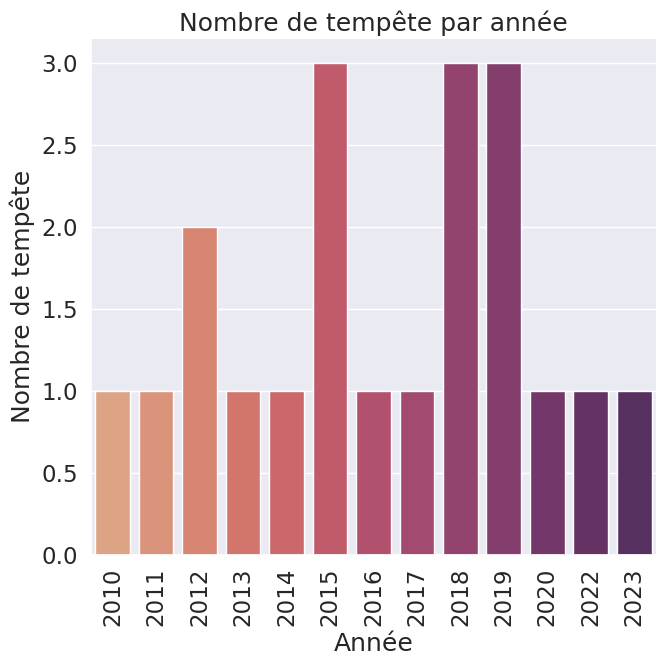

In [72]:
sns.catplot( data=mesures, x='Année', kind="count",height=7, palette="flare")
plt.xlabel("Année")
plt.ylabel("Nombre de tempête")
plt.title("Nombre de tempête par année")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

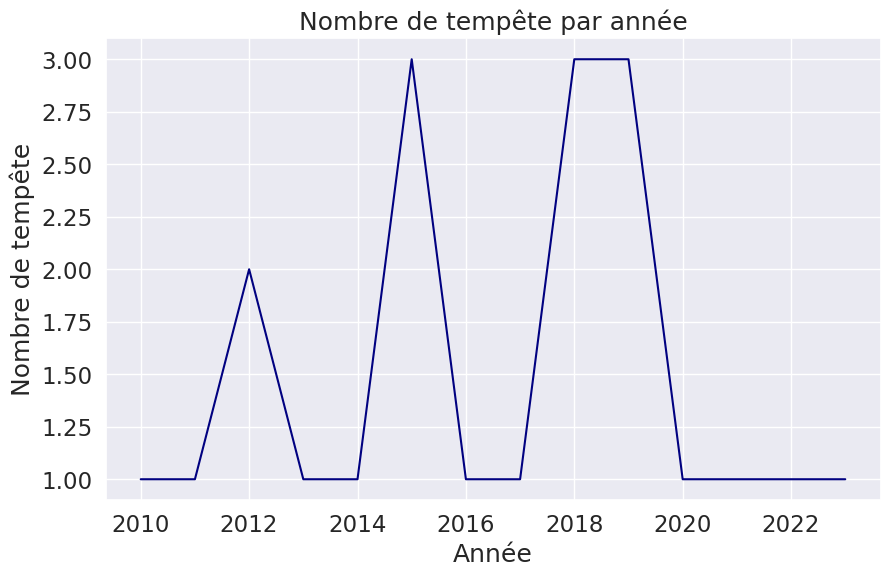

In [73]:
plt.figure(figsize=(10, 6))
result.plot(color = "navy", label ="données")
plt.xlabel('Année')
plt.ylabel('Nombre de tempête')
plt.title('Nombre de tempête par année')
plt.show()

Estimation : a = 0.0 et b = -27.1


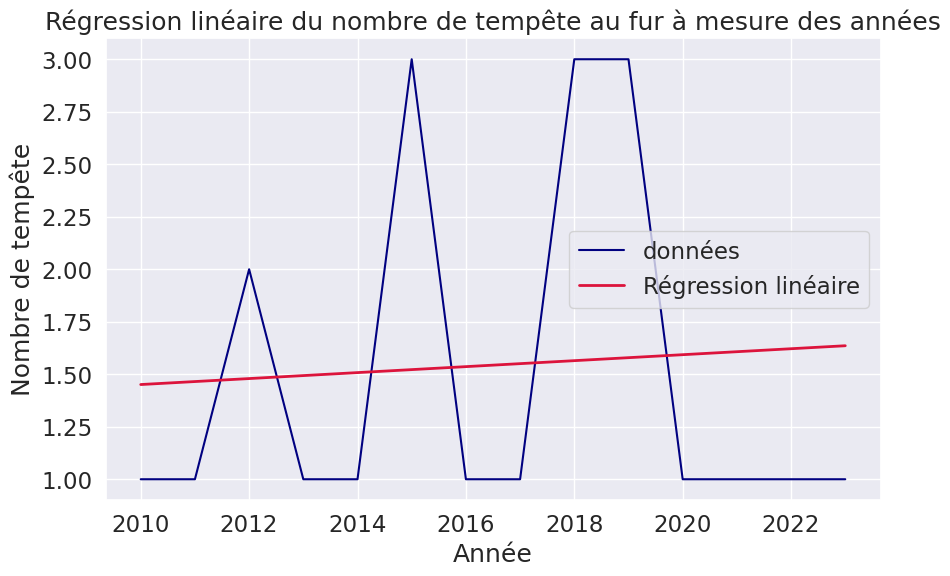

In [74]:
df = create_dataframe(result, 'Valeur')
X = df.index.values.reshape(-1, 1)  
Y = df['Valeur'].values 

model = LinearRegression()
fct = model.fit(X, Y)
y_pred = model.predict(X)
print("Estimation : a = %.1f" %fct.coef_[0] + " et b = %.1f" %fct.intercept_)


plt.figure(figsize=(10, 6))
result.plot(color = "navy", label ="données")
plt.plot(X, y_pred, color='crimson', linewidth=2, label='Régression linéaire')
plt.xlabel('Année')
plt.ylabel('Nombre de tempête')
plt.title('Régression linéaire du nombre de tempête au fur à mesure des années')
plt.legend()
plt.show()

In [75]:
X_Cor = [[2030]]
Cor = model.predict(X_Cor)
print(Cor)

[1.73522812]


Nous avons ici une **régression linéaire** du nombre de tempête au fur à mesure des années pour la région **Corse**.
On remarque ici que notre régression linéaire est **croissante**. 

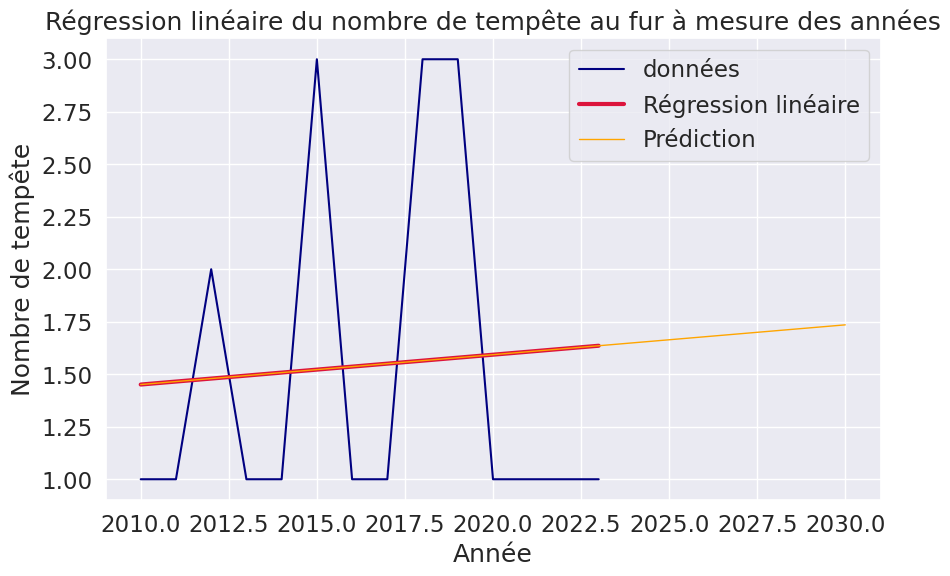

In [76]:
nouvelles_années = np.array([[2024], [2025], [2026], [2027], [2028], [2029], [2030]])
X2 = np.concatenate((X, nouvelles_années))

linear_regressor = LinearRegression(copy_X=True, fit_intercept=True)
fct = linear_regressor.fit(X, Y)
y_pred =  fct.intercept_ + X*fct.coef_[0]

plt.figure(figsize=(10, 6))
result.plot(color = "navy", label ="données")
plt.plot(X, y_pred, color='crimson', linewidth=3, label='Régression linéaire')
plt.plot([np.min(X2), np.max(X2)], [fct.intercept_ + np.min(X2)*fct.coef_[0], fct.intercept_ + np.max(X2)*fct.coef_[0]], linewidth = 1, color='orange', label="Prédiction")
plt.xlabel('Année')
plt.ylabel('Nombre de tempête')
plt.title('Régression linéaire du nombre de tempête au fur à mesure des années')
plt.legend()
plt.show()

In [77]:
r_sq2 = fct.score(X, Y)
print('Coefficient de determination:', r_sq2)

Coefficient de determination: 0.004500124657192406


**Occitanie** :

In [78]:
Occi = top5_regions[top5_regions["region (name)"] == "Occitanie"]
mesures = pd.DataFrame(Occi)
mesures.index = pd.to_datetime(mesures.index, utc=True)
mesures['Année'] = mesures.index.year
result = mesures.groupby('Année').size()

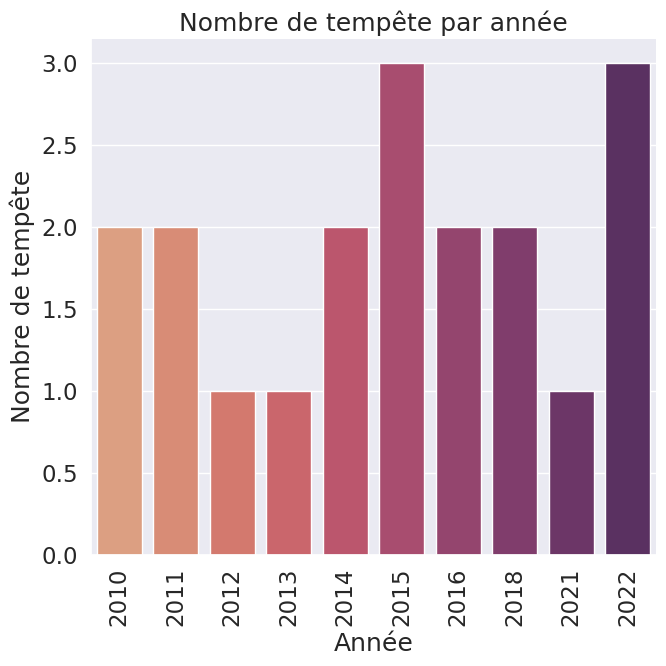

In [79]:
sns.catplot( data=mesures, x='Année', kind="count",height=7, palette="flare")
plt.xlabel("Année")
plt.ylabel("Nombre de tempête")
plt.title("Nombre de tempête par année")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

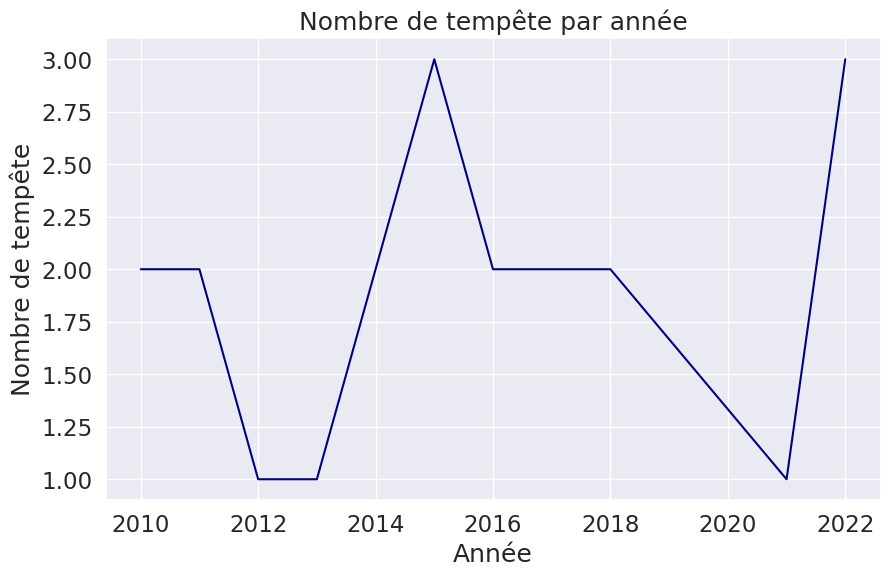

In [80]:
plt.figure(figsize=(10, 6))
result.plot(color = "navy", label ="données")
plt.xlabel('Année')
plt.ylabel('Nombre de tempête')
plt.title('Nombre de tempête par année')
plt.show()

Estimation : a = 0.0 et b = -81.6


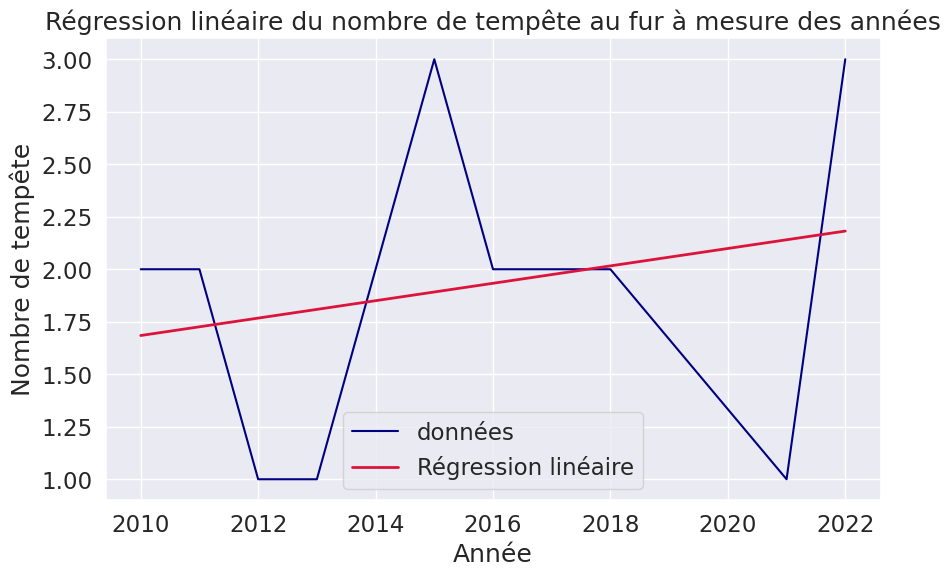

In [81]:
df = create_dataframe(result, 'Valeur')
X = df.index.values.reshape(-1, 1)  
Y = df['Valeur'].values 

model = LinearRegression()
fct = model.fit(X, Y)
y_pred = model.predict(X)
print("Estimation : a = %.1f" %fct.coef_[0] + " et b = %.1f" %fct.intercept_)


plt.figure(figsize=(10, 6))
result.plot(color = "navy", label ="données")
plt.plot(X, y_pred, color='crimson', linewidth=2, label='Régression linéaire')
plt.xlabel('Année')
plt.ylabel('Nombre de tempête')
plt.title('Régression linéaire du nombre de tempête au fur à mesure des années')
plt.legend()
plt.show()

In [82]:
X_Occi = [[2030]]
Occi = model.predict(X_Occi)
print(Occi)

[2.51336898]


Nous avons ici une **régression linéaire** du nombre de tempête au fur à mesure des années pour la région **Occitanie**.
On remarque ici que notre régression linéaire est **croissante**. 

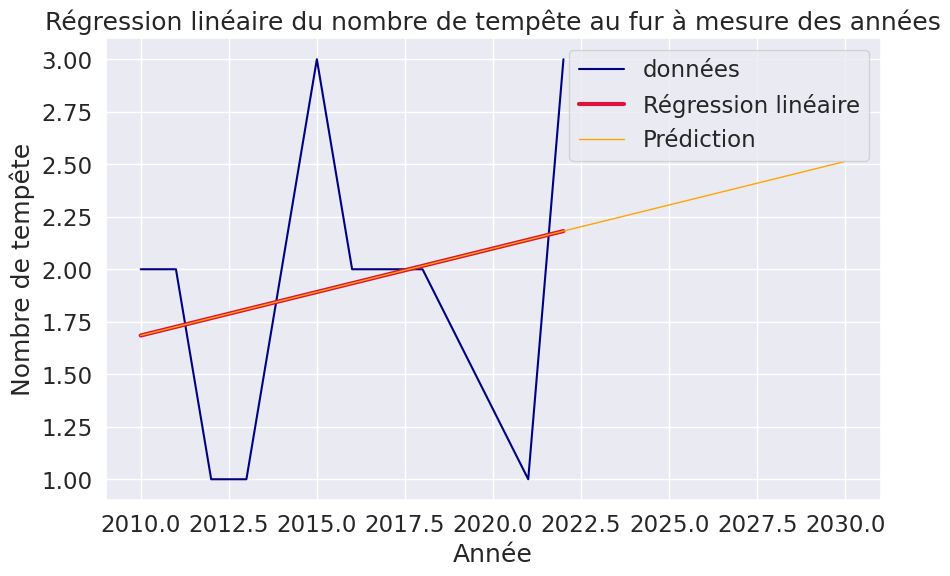

In [83]:
nouvelles_années = np.array([[2024], [2025], [2026], [2027], [2028], [2029], [2030]])
X2 = np.concatenate((X, nouvelles_années))

linear_regressor = LinearRegression(copy_X=True, fit_intercept=True)
fct = linear_regressor.fit(X, Y)
y_pred =  fct.intercept_ + X*fct.coef_[0]

plt.figure(figsize=(10, 6))
result.plot(color = "navy", label ="données")
plt.plot(X, y_pred, color='crimson', linewidth=3, label='Régression linéaire')
plt.plot([np.min(X2), np.max(X2)], [fct.intercept_ + np.min(X2)*fct.coef_[0], fct.intercept_ + np.max(X2)*fct.coef_[0]], linewidth = 1, color='orange', label="Prédiction")
plt.xlabel('Année')
plt.ylabel('Nombre de tempête')
plt.title('Régression linéaire du nombre de tempête au fur à mesure des années')
plt.legend()
plt.show()

In [84]:
r_sq3 = fct.score(X, Y)
print('Coefficient de determination:', r_sq3)

Coefficient de determination: 0.05243915748117667


**Auvergne-Rhône-Alpes** :

In [85]:
ARA = top5_regions[top5_regions["region (name)"] == "Auvergne-Rhône-Alpes"]
mesures = pd.DataFrame(ARA)
mesures.index = pd.to_datetime(mesures.index, utc=True)
mesures['Année'] = mesures.index.year
result = mesures.groupby('Année').size()

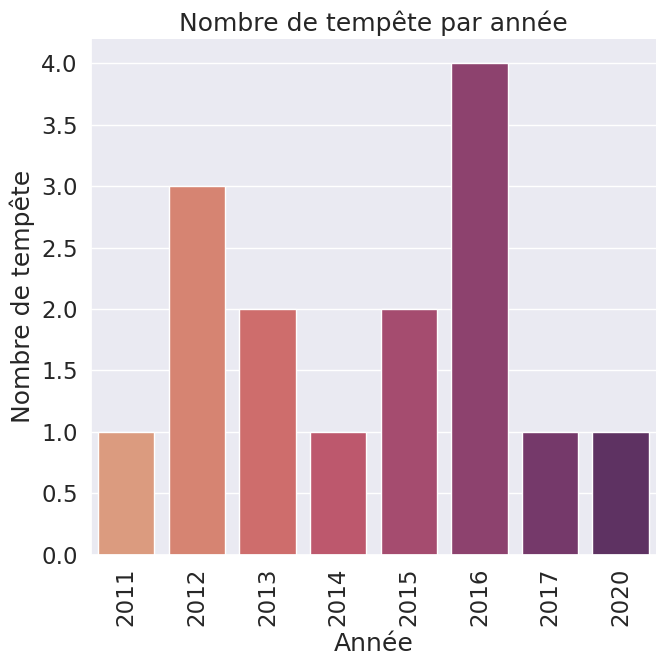

In [86]:
sns.catplot( data=mesures, x='Année', kind="count",height=7, palette="flare")
plt.xlabel("Année")
plt.ylabel("Nombre de tempête")
plt.title("Nombre de tempête par année")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

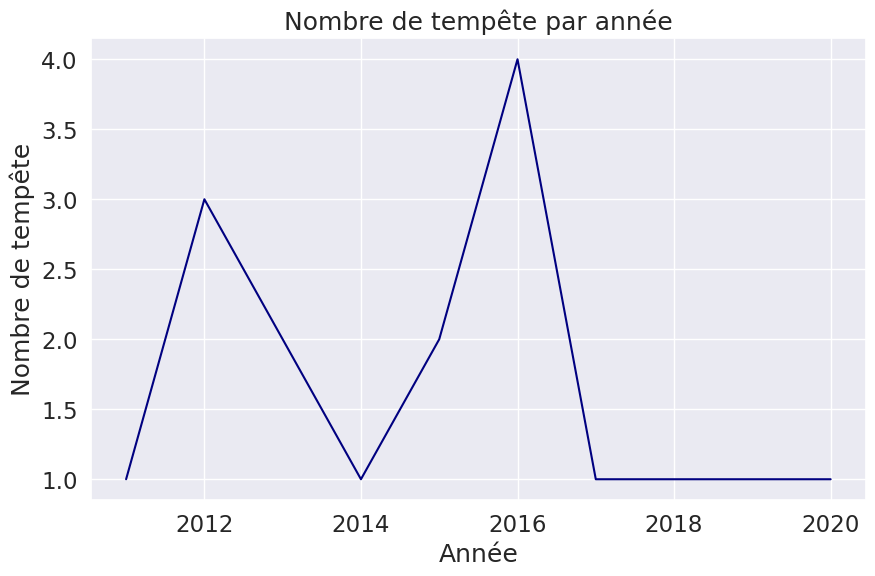

In [87]:
plt.figure(figsize=(10, 6))
result.plot(color = "navy", label ="données")
plt.xlabel('Année')
plt.ylabel('Nombre de tempête')
plt.title('Nombre de tempête par année')
plt.show()

Estimation : a = -0.1 et b = 111.9


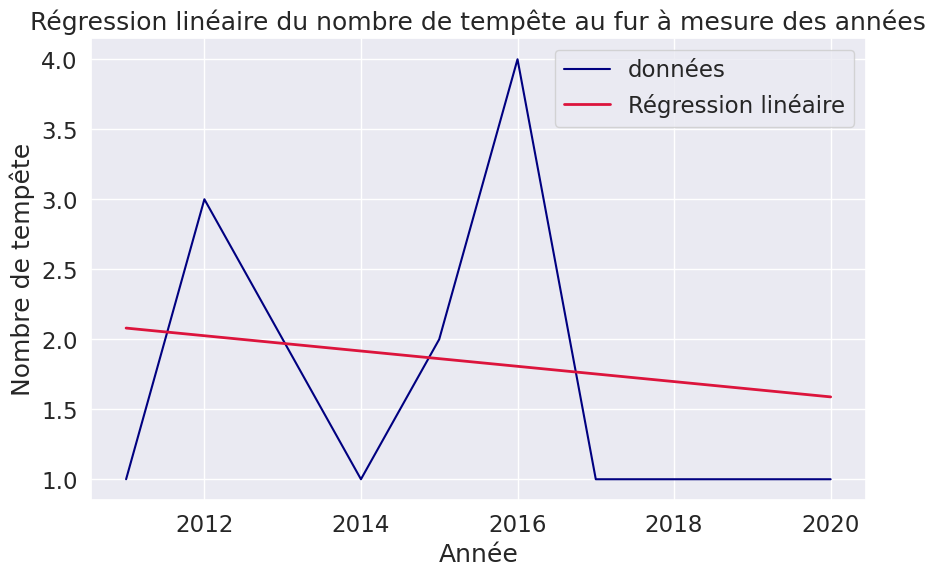

In [88]:
df = create_dataframe(result, 'Valeur')
X = df.index.values.reshape(-1, 1)  
Y = df['Valeur'].values 

model = LinearRegression()
fct = model.fit(X, Y)
y_pred = model.predict(X)
print("Estimation : a = %.1f" %fct.coef_[0] + " et b = %.1f" %fct.intercept_)


plt.figure(figsize=(10, 6))
result.plot(color = "navy", label ="données")
plt.plot(X, y_pred, color='crimson', linewidth=2, label='Régression linéaire')
plt.xlabel('Année')
plt.ylabel('Nombre de tempête')
plt.title('Régression linéaire du nombre de tempête au fur à mesure des années')
plt.legend()
plt.show()

In [89]:
X_ARA = [[2030]]
ARA = model.predict(X_ARA)
print(ARA)

[1.04201681]


Nous avons ici une **régression linéaire** du nombre de tempête au fur à mesure des années pour la région **Auvergne-Rhône-Alpes**.
On remarque ici que notre régression linéaire est **décroissante**. 

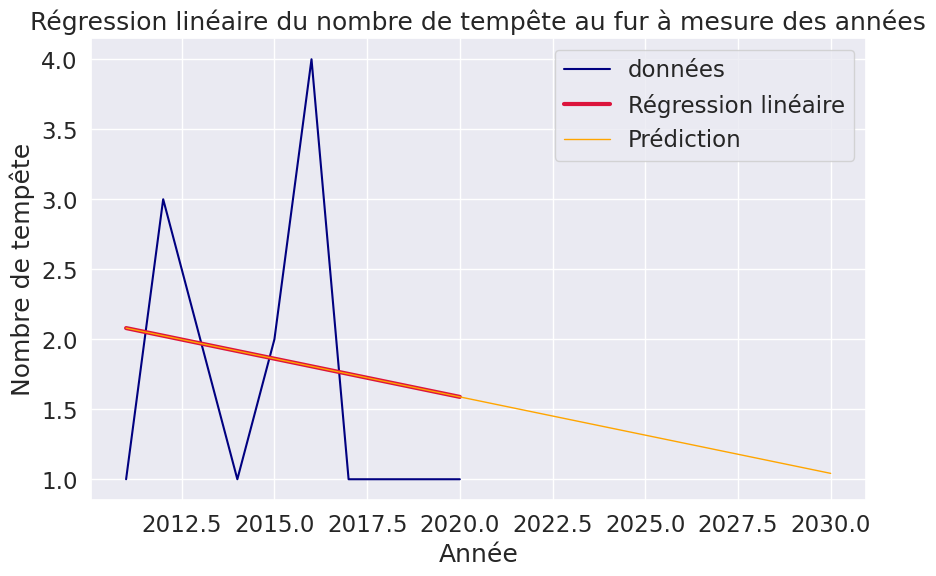

In [90]:
nouvelles_années = np.array([[2024], [2025], [2026], [2027], [2028], [2029], [2030]])
X2 = np.concatenate((X, nouvelles_années))

linear_regressor = LinearRegression(copy_X=True, fit_intercept=True)
fct = linear_regressor.fit(X, Y)
y_pred =  fct.intercept_ + X*fct.coef_[0]

plt.figure(figsize=(10, 6))
result.plot(color = "navy", label ="données")
plt.plot(X, y_pred, color='crimson', linewidth=3, label='Régression linéaire')
plt.plot([np.min(X2), np.max(X2)], [fct.intercept_ + np.min(X2)*fct.coef_[0], fct.intercept_ + np.max(X2)*fct.coef_[0]], linewidth = 1, color='orange', label="Prédiction")
plt.xlabel('Année')
plt.ylabel('Nombre de tempête')
plt.title('Régression linéaire du nombre de tempête au fur à mesure des années')
plt.legend()
plt.show()

In [91]:
r_sq4 = fct.score(X, Y)
print('Coefficient de determination:', r_sq4)

Coefficient de determination: 0.020002367144034805


**Bretagne** :

In [92]:
Bret = top5_regions[top5_regions["region (name)"] == "Bretagne"]
mesures = pd.DataFrame(Bret)
mesures.index = pd.to_datetime(mesures.index, utc=True)
mesures['Année'] = mesures.index.year
result = mesures.groupby('Année').size()

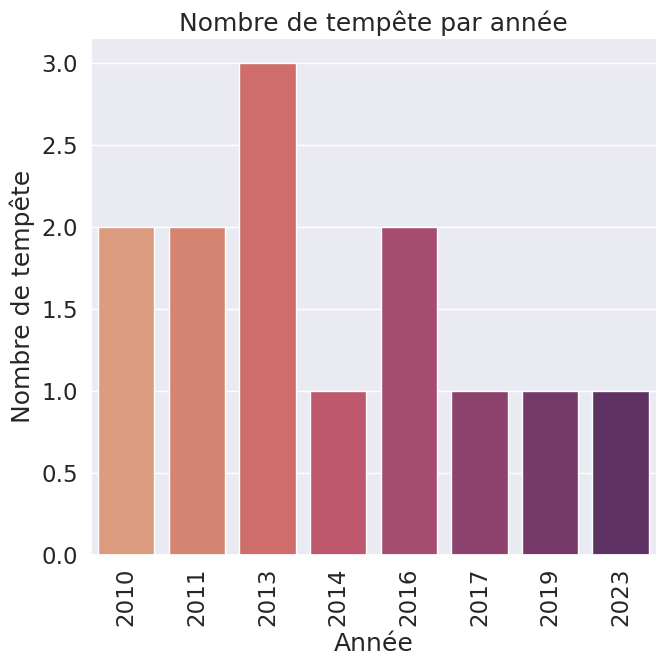

In [93]:
sns.catplot( data=mesures, x='Année', kind="count",height=7, palette="flare")
plt.xlabel("Année")
plt.ylabel("Nombre de tempête")
plt.title("Nombre de tempête par année")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

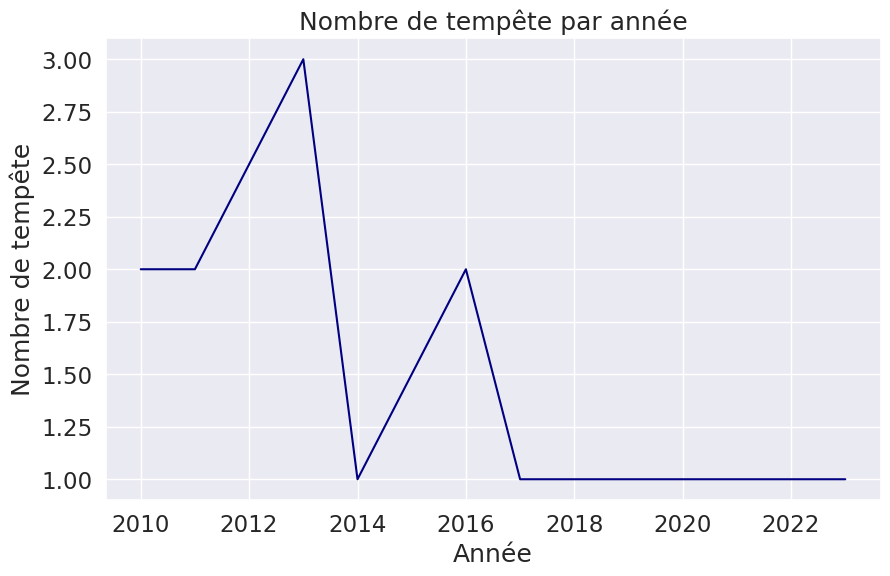

In [94]:
plt.figure(figsize=(10, 6))
result.plot(color = "navy", label ="données")
plt.xlabel('Année')
plt.ylabel('Nombre de tempête')
plt.title('Nombre de tempête par année')
plt.show()

Estimation : a = -0.1 et b = 216.9


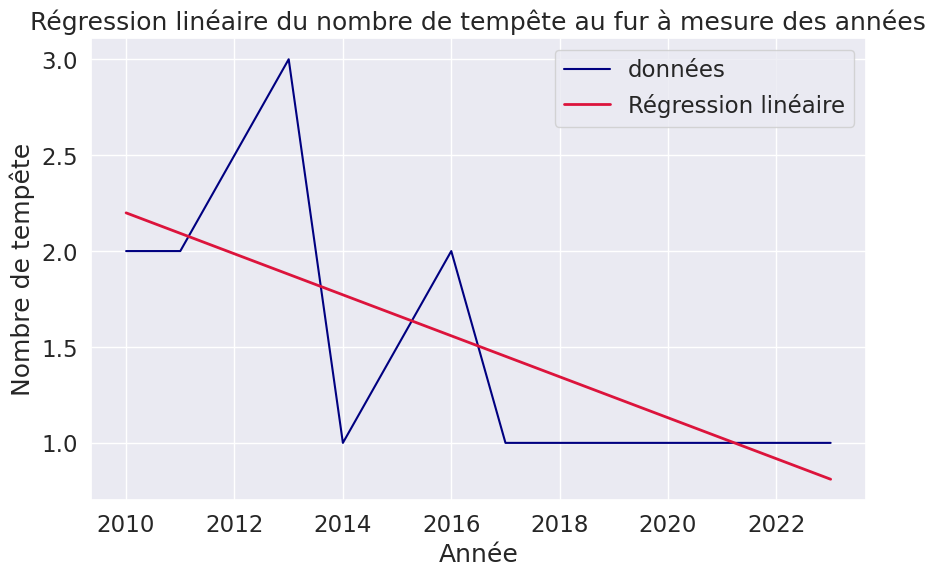

In [95]:
df = create_dataframe(result, 'Valeur')
X = df.index.values.reshape(-1, 1)  
Y = df['Valeur'].values 

model = LinearRegression()
fct = model.fit(X, Y)
y_pred = model.predict(X)
print("Estimation : a = %.1f" %fct.coef_[0] + " et b = %.1f" %fct.intercept_)


plt.figure(figsize=(10, 6))
result.plot(color = "navy", label ="données")
plt.plot(X, y_pred, color='crimson', linewidth=2, label='Régression linéaire')
plt.xlabel('Année')
plt.ylabel('Nombre de tempête')
plt.title('Régression linéaire du nombre de tempête au fur à mesure des années')
plt.legend()
plt.show()

In [96]:
X_Bret = [[2030]]
Bret = model.predict(X_Bret)
print(Bret)

[0.06256015]


Nous avons ici une **régression linéaire** du nombre de tempête au fur à mesure des années pour la région **Bretagne**.
On remarque ici que notre régression linéaire est **décroissante**. 

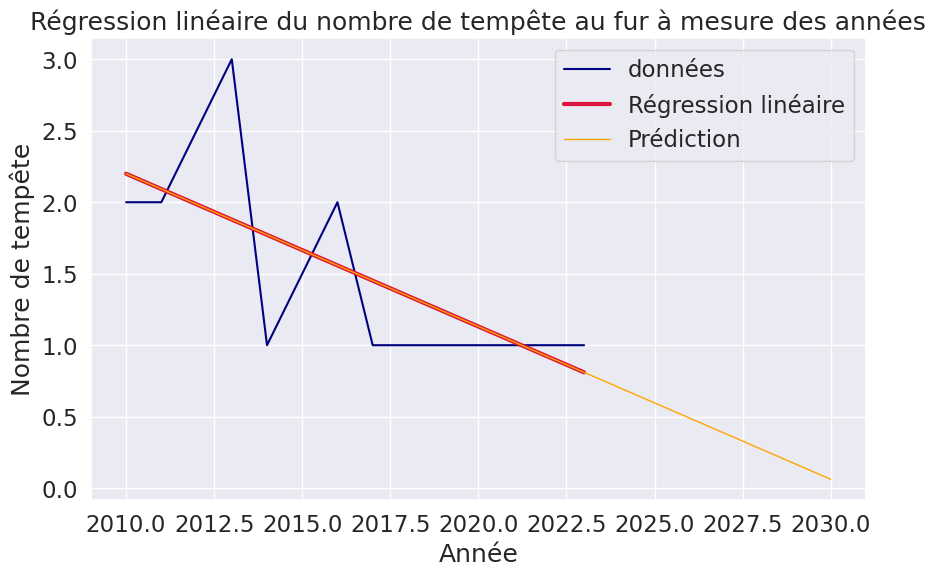

In [97]:
nouvelles_années = np.array([[2024], [2025], [2026], [2027], [2028], [2029], [2030]])
X2 = np.concatenate((X, nouvelles_années))

linear_regressor = LinearRegression(copy_X=True, fit_intercept=True)
fct = linear_regressor.fit(X, Y)
y_pred =  fct.intercept_ + X*fct.coef_[0]

plt.figure(figsize=(10, 6))
result.plot(color = "navy", label ="données")
plt.plot(X, y_pred, color='crimson', linewidth=3, label='Régression linéaire')
plt.plot([np.min(X2), np.max(X2)], [fct.intercept_ + np.min(X2)*fct.coef_[0], fct.intercept_ + np.max(X2)*fct.coef_[0]], linewidth = 1, color='orange', label="Prédiction")
plt.xlabel('Année')
plt.ylabel('Nombre de tempête')
plt.title('Régression linéaire du nombre de tempête au fur à mesure des années')
plt.legend()
plt.show()

In [98]:
r_sq5 = fct.score(X, Y)
print('Coefficient de determination:', r_sq5)

Coefficient de determination: 0.3825328324381322


# 7. Conclusion

Pour conclure, en ce qui concerne notre problématique initiale nous avons pu déterminer le **Top 5 des régions** qui ont été le plus touchées par les tempêtes depuis 2010 en France métropolitaine. En effet, ce Top 5 est le suivant : **Provence-Alpes-Côte d'Azur, Corse, Occitanie, Auvergne-Rhône-Alpes et Bretagne**. 

En ce qui concerne ce résultat, il semble plutôt cohérent. Une question se pose sur le région **PACA**, ce résultat reste surprenant, peut-être qu’avec un peu plus de recherche ce résultat serait explicable.

En ce qui concerne maintenant la **seconde question** sur la prédiction, nous avons un résultat de même **assez surprenant**. En effet, la théorie dit qu’avec le réchauffement climatique le nombre de tempête est censé **augmenter au cours des années**. Or parmi nos prédictions seulement **2** confirment cette hypothèse tandis que les autres prédisent que le **nombre de tempêtes diminuent**.

In [99]:
dico_coef = {"PACA": r_sq1, "Corse": r_sq2,"Occi":r_sq3, "ARA": r_sq4, "Breizh": r_sq5}
print("Ce dictionnaire représente l'ensemble des coefficient de determination pour chaque région :")
dico_coef

Ce dictionnaire représente l'ensemble des coefficient de determination pour chaque région :


{'PACA': 0.11118314424635589,
 'Corse': 0.004500124657192406,
 'Occi': 0.05243915748117667,
 'ARA': 0.020002367144034805,
 'Breizh': 0.3825328324381322}

Cependant, on remarque que la plupart de nos coefficient de détermination sont très proches de **0 voir égaux**. Ainsi, on peut remettre très facilement en question nos prédictions et cette remise en cause est logique lorsque l’on voit **l'hétérogénéité du nombre de tempêtes au cours des années pour chaque région**. 

In [101]:
dico_predi = {"PACA": float(PACAX), "Corse": float(Cor),"Occi":float(Occi), "ARA": float(ARA), "Breizh": float(Bret)}
print("Ce dictionnaire représente l'ensemble des prédictions en 2030 pour chaque région :")
dico_predi

Ce dictionnaire représente l'ensemble des prédictions en 2030 pour chaque région :


{'PACA': 2.6021069692058347,
 'Corse': 1.7352281226626793,
 'Occi': 2.5133689839572213,
 'ARA': 1.0420168067226854,
 'Breizh': 0.06256015399424086}

Afin de répondre quand même à la **seconde problématique**, on peut grâce aux prédictions effectuer, affirmer que le **Top 5 des régions en 2030** changera et sera le suivant : **Provence-Alpes-Côte d'Azur, Occitanie, Corse, Auvergne-Rhône-Alpes et Bretagne**. Finalement, en 2030, la région **Occitanie** aura plus de tempêtes que la région **Corse**.

# Références

[1] : Définitions - Tempêtes en France métropolitaine. (s. d.). http://tempetes.meteo.fr/Definitions.html#:~:text=L'appellation%20temp%C3%AAte%20est%20donc,sup%C3%A9rieures%20%C3%A0%20100%20km%2Fh.

[2] : Dubault, F. (2020, 10 juin). Un record historique de pluie à Montpellier et des millions de dégâts dans l’Hérault. France 3 Occitanie. https://france3-regions.francetvinfo.fr/occitanie/2014/09/30/un-record-historique-de-pluie-montpellier-et-des-millions-de-degats-dans-l-herault-561820.html

[3] : Vents violents et tempêtes : quelles sont les différences ? | Météo-France. (s. d.). https://meteofrance.com/actualites-et-dossiers/comprendre-la-meteo/le-vent/vents-violents-et-tempetes-quelles-sont-les-differences

[4] : Les vents régionaux méditerranéens - Tempêtes en France métropolitaine. (s. d.). http://tempetes.meteo.fr/Les-vents-regionaux-mediterraneens.html#:~:text=La%20rose%20des%20vents%20%C%A0%20Marignane%20

[5] : Quelle est la température la plus élevée enregistrée en France ? | Météo-France. (s. d.). https://meteofrance.com/magazine/meteo-questions/quelle-est-la-temperature-la-plus-elevee-enregistree-en-france

[6] : Jérôme, D. (2023, 24 octobre). Impacts du changement climatique : Atmosphère, Températures et Précipitations. Ministère de la Transition Écologique et de la Cohésion des Territoires. https://www.ecologie.gouv.fr/impacts-du-changement-climatique-atmosphere-temperatures-et-precipitations